In [69]:
import pyrender
import os
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as Rot
from scipy.stats import special_ortho_group

os.environ['PYOPENGL_PLATFORM'] = 'egl'

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1. -1.]
 [ 0.  0.  0.  1.]]


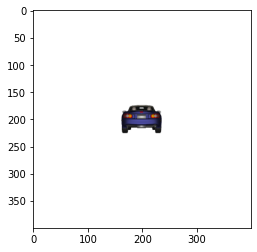

In [70]:
r = pyrender.OffscreenRenderer(viewport_width=400,viewport_height=400,point_size=1.0)

fuze_trimesh = trimesh.load('/hdd/zen/data/Reallite/ShapeNetCore.v2/02958343/7d4fd8ed77355364fa98472c1d231070/models/model_normalized.obj')
# fuze_trimesh = trimesh.load('/hdd/zen/data/Reallite/ShapeNetCore.v1/02958343/1c1a3dc04b6f1f8fd8162cce87567b4/model.obj')

curr_rot = Rot.from_euler("zyx", [0, 0, 0])
transform33 = curr_rot.as_matrix()
transform = np.eye(4)
transform[:3,:3] = transform33
transform[2,3] = -1
fuze_trimesh.apply_transform(transform)

scene = pyrender.Scene.from_trimesh_scene(fuze_trimesh)
camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0)
s = np.sqrt(2)/2
camera_pose = np.array([
        [1.0, 0,   0,  0],
        [0,  1.0, 0.0, 0],
        [0.0,  0,   1,   1],
        [0.0,  0.0, 0.0, 1.0],])
# camera_pose[:3,:3] = curr_rot.as_matrix()
scene.add(camera, pose=camera_pose)
light = pyrender.SpotLight(color=np.ones(3), intensity=5.0,
                            innerConeAngle=np.pi/6.0,
                            outerConeAngle=np.pi/6.0)
scene.add(light, pose=camera_pose)
color, depth = r.render(scene)
plt.imshow(color)
print(transform33)
print(transform)

In [6]:
curr_rot = Rot.from_matrix(camera_pose[:3,:3])
print(curr_rot.as_euler("zyx"))
curr_rot = Rot.from_euler("zyx", [0, 0, 0.        ])
print(curr_rot.as_matrix())

[0. 0. 0.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


failed to combine visuals
Traceback (most recent call last):
  File "/root/anaconda3/envs/actmix/lib/python3.6/site-packages/trimesh/util.py", line 1406, in concatenate
    visual = meshes[0].visual.concatenate(
AttributeError: 'TextureVisuals' object has no attribute 'concatenate'


(-0.5, 0.5)

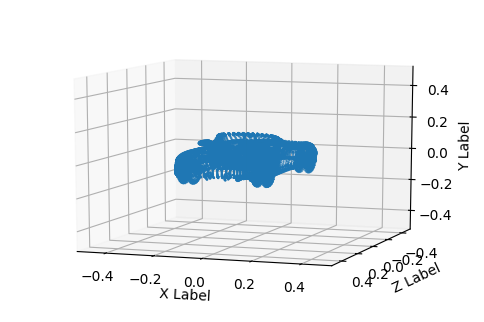

In [36]:
fuze_trimesh = trimesh.load('/hdd/zen/data/Reallite/ShapeNetCore.v2/02958343/7d4fd8ed77355364fa98472c1d231070/models/model_normalized.obj')
mesh_vert = fuze_trimesh.dump().sum()
vertices = np.array(mesh_vert.vertices)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
transform_world_to_matplot = np.array([
    [1,0,0],
    [0,0,1],
    [0,1,0]
])
vertices = np.matmul(vertices, transform_world_to_matplot)

fig = plt.figure(dpi = 100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], s = 0.5)
ax.view_init(elev=10., azim=-70)
ax.set_xlabel('X Label')
ax.set_ylabel('Z Label')
ax.set_zlabel('Y Label')

ax.set_xlim(-0.5, 0.5)
ax.set_ylim(0.5, -0.5)
ax.set_zlim(-0.5, 0.5)

failed to combine visuals
Traceback (most recent call last):
  File "/root/anaconda3/envs/actmix/lib/python3.6/site-packages/trimesh/util.py", line 1406, in concatenate
    visual = meshes[0].visual.concatenate(
AttributeError: 'TextureVisuals' object has no attribute 'concatenate'


Text(0.5, 0, 'Y Label')

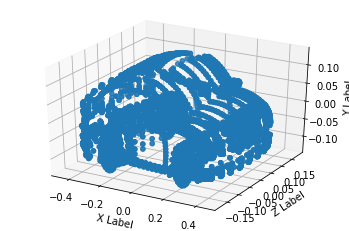

In [10]:
fuze_trimesh = trimesh.load('/hdd/zen/data/Reallite/ShapeNetCore.v1/02958343/7dac31838b627748eb631ba05bd8dfe/model.obj')
mesh_vert = fuze_trimesh.dump().sum()
vertices = np.array(mesh_vert.vertices)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vertices[:,0], vertices[:,2], vertices[:,1])
ax.set_xlabel('X Label')
ax.set_ylabel('Z Label')
ax.set_zlabel('Y Label')


<!-- ### Actual Rendering -->

In [137]:
# model_path = '/hdd/zen/data/Reallite/ShapeNetCore.v2/02958343/7d4fd8ed77355364fa98472c1d231070/models/model_normalized.obj'
# model_path = '/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8abd5158ec94dfd8924bf081da6f024c/models/model_normalized.obj'
# model_path = '/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/357e2dd1512b96168e2b488ea5fa466a/models/model_normalized.obj'
model_path = "/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/51ec0bdeb8bd9b8d60eb699207aa149d/models/model_normalized.obj"

def render_pose_data(model_path, num_frames, width = 400, height = 400, show = False):
    r = pyrender.OffscreenRenderer(viewport_width=width,viewport_height=height,point_size=1.0)
    fuze_trimesh = trimesh.load(model_path)
    camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0)
    camera_pose = np.array([
            [1.0, 0,   0,  0],
            [0,  1.0, 0.0, 0],
            [0.0,  0,   1,   1.3],
            [0.0,  0.0, 0.0, 1.0],])

    if isinstance(fuze_trimesh, trimesh.scene.scene.Scene):
        scene = pyrender.Scene.from_trimesh_scene(fuze_trimesh)
        nodes = list(scene.nodes)
        for i in nodes:
            scene.remove_node(i)
        meshParent = pyrender.Node("MsehNode", children = nodes)
        scene.add_node(meshParent)
        mesh_vert = np.vstack([i.vertices for i in fuze_trimesh.dump()])

    else:
        scene = pyrender.Scene()
        meshParent = pyrender.Mesh.from_trimesh(fuze_trimesh)
        scene.add(meshParent)
        meshParent = list(scene.nodes)[0]
        mesh_vert = np.array(fuze_trimesh.vertices)

    scene.add(camera, pose=camera_pose)
    light = pyrender.SpotLight(color=np.ones(3), intensity=20.0,
                                innerConeAngle=np.pi/6.0,
                                outerConeAngle=np.pi/6.0)
    scene.add(light, pose=camera_pose)
    transform = np.eye(4)
    

    import time 
    t_s = time.time()
    poses = []
    images = []
    depths = []
    for i in range(num_frames):
        x = special_ortho_group.rvs(3)
        transform[:3,:3] = x
        scene.set_pose(meshParent, transform)
        color, depth = r.render(scene)
        images.append(color)
        poses.append(np.copy(transform))
        depths.append(depth)
        if show:
            plt.imshow(color)
            plt.show()
    dt = time.time() - t_s
    
    print("Rendering Time used {:.4f}s".format(dt))
    
    
    return images, depths, poses, mesh_vert

images, depth, poses, mesh_vert = render_pose_data(model_path, 5, show = False)
# render_pose_data(model_path, 5, show = False)

Rendering Time used 0.0653s


In [41]:
SHAPENET_ID = {'04379243': 'table', '03211117': 'monitor', '04401088': 'phone',
                   '04530566': 'watercraft', '03001627': 'chair', '03636649': 'lamp',
                   '03691459': 'speaker', '02828884': 'bench', '02691156': 'plane',
                   '02808440': 'bathtub', '02871439': 'bookcase', '02773838': 'bag',
                   '02801938': 'basket', '02880940': 'bowl', '02924116': 'bus',
                   '02933112': 'cabinet', '02942699': 'camera', '02958343': 'car',
                   '03207941': 'dishwasher', '03337140': 'file', '03624134': 'knife',
                   '03642806': 'laptop', '03710193': 'mailbox', '03761084': 'microwave',
                   '03928116': 'piano', '03938244': 'pillow', '03948459': 'pistol',
                   '04004475': 'printer', '04099429': 'rocket', '04256520': 'sofa',
                   '04554684': 'washer', '04090263': 'rifle', '02946921': 'can'}


In [139]:
import glob
import cv2
import os.path as osp

def write_pose_data(output_path, model_id, images, depth, poses, mesh_vert):
    data_output = osp.join(output_path,"data", model_id)
    model_output = osp.join(output_path, "models", model_id)
    
    os.makedirs(data_output, exist_ok=True)
    os.makedirs(model_output, exist_ok=True)
    for i in range(len(images)):
        name_base = os.path.join(data_output, "{:06d}".format(i))
        curr_image = images[i]
        curr_depth = depth[i]
        curr_pose = poses[i]
        cv2.imwrite(name_base + "-color.png", cv2.cvtColor(curr_image, cv2.COLOR_RGB2BGR))
        np.savez(name_base + "-meta.npz", pose = curr_pose, model_id = model_id)
        np.savez(name_base + "-depth.npz", depth = curr_depth)
        
    with open(os.path.join(model_output, "points.xyz"), "w+")  as f:
        for i in mesh_vert:
            f.write(' '.join([str(j) for j in i]) + "\n")

def gen_data_by_path(model_path, num_frames):
    model_id = model_path.split("/")[-3]
    print(model_path)
    images, depth, poses, mesh_vert = render_pose_data(model_path, num_frames)
    write_pose_data(output_path, model_id, images, depth, poses, mesh_vert)
    

shapenet_paths = glob.glob("/hdd/zen/data/Reallite/ShapeNetCore.v2/[0-9]*")
shapnet_base = "/hdd/zen/data/Reallite/ShapeNetCore.v2/"
cat_target = "03001627"
output_path = "/hdd/zen/data/Reallite/Rendering/test"


data_output = osp.join(output_path, "data")
model_output = osp.join(output_path, "models")
os.makedirs(data_output, exist_ok=True)
os.makedirs(model_output, exist_ok=True)

target_paths = glob.glob(os.path.join(shapnet_base, cat_target, "*", "models", "model_normalized.obj"))
for idx, model_path in enumerate(target_paths):
    model_id = model_path.split("/")[-3]
#     if model_id == "357e2dd1512b96168e2b488ea5fa466a":
    gen_data_by_path(model_path, 1)


51ec0bdeb8bd9b8d60eb699207aa149d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/51ec0bdeb8bd9b8d60eb699207aa149d/models/model_normalized.obj
Rendering Time used 0.0240s
3df44d30265f697e7e684d25d4dcaf0
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3df44d30265f697e7e684d25d4dcaf0/models/model_normalized.obj
Rendering Time used 0.0264s
f2f0f205af792d3d40332412c5d013fb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f2f0f205af792d3d40332412c5d013fb/models/model_normalized.obj
Rendering Time used 0.0212s
c44413bb705968bb71a782a4379556c7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c44413bb705968bb71a782a4379556c7/models/model_normalized.obj
Rendering Time used 0.0170s
68c7f82dd1e1634d9338458f802f5ad7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/68c7f82dd1e1634d9338458f802f5ad7/models/model_normalized.obj
Rendering Time used 0.0245s
e1897a4391784bc2e8b2b8dc0c816caf
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e1897a4391784bc2e8b2b8dc0c816caf/models/model_normalized.obj
Rendering 

faces have mixed data, using slow fallback!


Rendering Time used 0.0222s
5d9906be39e2ee012f24668c019c448f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5d9906be39e2ee012f24668c019c448f/models/model_normalized.obj
Rendering Time used 0.0237s
383b4dbf090a73dd597eda2e51f31317
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/383b4dbf090a73dd597eda2e51f31317/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0359s
e68bb6f55e2454fac7f1f7c0570e288d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e68bb6f55e2454fac7f1f7c0570e288d/models/model_normalized.obj
Rendering Time used 0.0165s
36447db5cf7b5a27ab5c60fa85a57ffd
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/36447db5cf7b5a27ab5c60fa85a57ffd/models/model_normalized.obj
Rendering Time used 0.0188s
6831b0aaec44c01f5d0b6dbf2c4992eb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6831b0aaec44c01f5d0b6dbf2c4992eb/models/model_normalized.obj
Rendering Time used 0.0195s
f9d050a51da1f3ed30bbd4cddd04c77b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f9d050a51da1f3ed30bbd4cddd04c77b/models/model_normalized.obj
Rendering Time used 0.0208s
bd0918d75e22cbf9febad4f49b26ec52
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bd0918d75e22cbf9febad4f49b26ec52/models/model_normalized.obj
Rendering Time used 0.0348s
674122da19a75d9bca86e527b84d8854
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/674122da19a75d9bca86e527b84d8854/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0371s
1cd152cfd71cd314e2798a633e84d70b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1cd152cfd71cd314e2798a633e84d70b/models/model_normalized.obj
Rendering Time used 0.0336s
d90b1021dc6e09b455369e3e5b79b017
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d90b1021dc6e09b455369e3e5b79b017/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0278s
6aba15a68e745c8d48fda83c10428379
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6aba15a68e745c8d48fda83c10428379/models/model_normalized.obj
Rendering Time used 0.0283s
4ecb13c40d55bc24fbcb0345af819bcb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4ecb13c40d55bc24fbcb0345af819bcb/models/model_normalized.obj
Rendering Time used 0.0171s
c0689f191df5cfe1c785f06f424b9d06
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c0689f191df5cfe1c785f06f424b9d06/models/model_normalized.obj
Rendering Time used 0.0218s
1d7fdf837564523dc89a28b5e6678e0
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1d7fdf837564523dc89a28b5e6678e0/models/model_normalized.obj
Rendering Time used 0.0158s
cf88ae03d8cc2fabfcce6278f5ffb13a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cf88ae03d8cc2fabfcce6278f5ffb13a/models/model_normalized.obj
Rendering Time used 0.0242s
dfe0e22865575c43cda85f6a3e19b0a1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/dfe0e22865575c43cda85f6a3e19b0a1/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0151s
a7bc0f5b5d73df73f51f77a6d7299806
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a7bc0f5b5d73df73f51f77a6d7299806/models/model_normalized.obj
Rendering Time used 0.0312s
5027bd5ab457e99068821642e9a54505
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5027bd5ab457e99068821642e9a54505/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0213s
63d92bf1f175a75a25ffbad401072b4d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/63d92bf1f175a75a25ffbad401072b4d/models/model_normalized.obj
Rendering Time used 0.0176s
753452a3a8f44bd38b69f185154696a3
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/753452a3a8f44bd38b69f185154696a3/models/model_normalized.obj
Rendering Time used 0.0195s
56ab99b69cbc1bb50d55c58aabe6e7b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/56ab99b69cbc1bb50d55c58aabe6e7b/models/model_normalized.obj
Rendering Time used 0.0179s
bd50871647e3712f79121b38af0e3f47
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bd50871647e3712f79121b38af0e3f47/models/model_normalized.obj
Rendering Time used 0.0282s
46cb1e740cf6e9ec7ea88ba060407992
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/46cb1e740cf6e9ec7ea88ba060407992/models/model_normalized.obj
Rendering Time used 0.0216s
e20a22906784e3d08758c89c2f45caa8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e20a22906784e3d08758c89c2f45caa8/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0243s
866e1be9f53830ed7a6617a3ecd0b52e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/866e1be9f53830ed7a6617a3ecd0b52e/models/model_normalized.obj
Rendering Time used 0.0155s
4dd8862c73931cafeaf14273fa406ffc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4dd8862c73931cafeaf14273fa406ffc/models/model_normalized.obj
Rendering Time used 0.0236s
f1dac1909107c0eef51f77a6d7299806
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f1dac1909107c0eef51f77a6d7299806/models/model_normalized.obj
Rendering Time used 0.0484s
ea572cc193b804399c66df0f068d2a36
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ea572cc193b804399c66df0f068d2a36/models/model_normalized.obj
Rendering Time used 0.0352s
f3e50f6d0b7b293035836c728d324152
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f3e50f6d0b7b293035836c728d324152/models/model_normalized.obj
Rendering Time used 0.0136s
7a7b08cf81cf358a8616812464c86290
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7a7b08cf81cf358a8616812464c86290/models/m

faces have mixed data, using slow fallback!


3a0e392db610f1a1504d5af97121b5f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3a0e392db610f1a1504d5af97121b5f/models/model_normalized.obj
Rendering Time used 0.0213s
1f1b07bf637b3a1582db9fca4b68095
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1f1b07bf637b3a1582db9fca4b68095/models/model_normalized.obj
Rendering Time used 0.0134s
ea577a1e9dffe7b55096c0dd2594842a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ea577a1e9dffe7b55096c0dd2594842a/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0330s
58e6fa617a1bed1a20b64028d2efc877
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/58e6fa617a1bed1a20b64028d2efc877/models/model_normalized.obj
Rendering Time used 0.0238s
4608b290c2383d7c9730cb37c9a5f63b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4608b290c2383d7c9730cb37c9a5f63b/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0204s
64a699cf5b2a43473f7e27638e63d848
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/64a699cf5b2a43473f7e27638e63d848/models/model_normalized.obj
Rendering Time used 0.0263s
d02f9ae175fa83d3e6fe3612af521500
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d02f9ae175fa83d3e6fe3612af521500/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0166s
1063d4fcd366de4060e37b3f76995f8b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1063d4fcd366de4060e37b3f76995f8b/models/model_normalized.obj
Rendering Time used 0.0278s
6782b941de7b2199a344c33f76676fbd
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6782b941de7b2199a344c33f76676fbd/models/model_normalized.obj
Rendering Time used 0.0169s
70230673214644cc7954eb05bbab463f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/70230673214644cc7954eb05bbab463f/models/model_normalized.obj
Rendering Time used 0.0194s
6b38324cb8beedc5ca86e527b84d8854
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6b38324cb8beedc5ca86e527b84d8854/models/model_normalized.obj
Rendering Time used 0.0188s
807c16e4f6f2c5852cf52ec1a1c9b69d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/807c16e4f6f2c5852cf52ec1a1c9b69d/models/model_normalized.obj
Rendering Time used 0.0207s
3dd04235c696c117db6d2ff65cc5b310
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3dd04235c696c117db6d2ff65cc5b310/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0235s
11c7675a3dbc0d32f7287e3d21227e43
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/11c7675a3dbc0d32f7287e3d21227e43/models/model_normalized.obj
Rendering Time used 0.0231s
226f096dbce49857bdfa5e0753fa3240
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/226f096dbce49857bdfa5e0753fa3240/models/model_normalized.obj
Rendering Time used 0.0314s
e9effe5159dc66673b93a3cd851adcaa
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e9effe5159dc66673b93a3cd851adcaa/models/model_normalized.obj
Rendering Time used 0.0313s
1eb1a8acd4185f49492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1eb1a8acd4185f49492d9da2668ec34c/models/model_normalized.obj
Rendering Time used 0.0171s
294f11afc4b60827d3ddd69b7fa8d158
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/294f11afc4b60827d3ddd69b7fa8d158/models/model_normalized.obj
Rendering Time used 0.0165s
3684490885c259e688235335f9e630b0
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3684490885c259e688235335f9e630b0/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0211s
75135e879341721c1cf9f632ab9ad62b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/75135e879341721c1cf9f632ab9ad62b/models/model_normalized.obj
Rendering Time used 0.0229s
5ce98a1c247f0a2d623ddc7262bf3bc6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5ce98a1c247f0a2d623ddc7262bf3bc6/models/model_normalized.obj
Rendering Time used 0.0222s
80415f427a9368227678f114ae956b82
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/80415f427a9368227678f114ae956b82/models/model_normalized.obj
Rendering Time used 0.0157s
efefba3f45a9e16dd64ad79e5981cc8f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/efefba3f45a9e16dd64ad79e5981cc8f/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0210s
c04f515b688f9d97fff16555386d173d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c04f515b688f9d97fff16555386d173d/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0226s
8e945aa01bbacf7c3fbe480a485feffd
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8e945aa01bbacf7c3fbe480a485feffd/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0211s
76fa373d984bd515504d5af97121b5f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/76fa373d984bd515504d5af97121b5f/models/model_normalized.obj
Rendering Time used 0.0255s
d619fd50c4d0fb46dea83bbf303af433
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d619fd50c4d0fb46dea83bbf303af433/models/model_normalized.obj
Rendering Time used 0.0262s
508450cc9ab2a5fa98cfd47a860803c5
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/508450cc9ab2a5fa98cfd47a860803c5/models/model_normalized.obj
Rendering Time used 0.0222s
ee1c0e545ab8dce862b3a719b353f115
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ee1c0e545ab8dce862b3a719b353f115/models/model_normalized.obj
Rendering Time used 0.0251s
5fa533f71e7e041efebad4f49b26ec52
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5fa533f71e7e041efebad4f49b26ec52/models/model_normalized.obj
Rendering Time used 0.0317s
c06a8f95fc273106b0f4a0d43d1e4c23
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c06a8f95fc273106b0f4a0d43d1e4c23/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0234s
c5e3f6da9e818851618dd45f797b66b4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c5e3f6da9e818851618dd45f797b66b4/models/model_normalized.obj
Rendering Time used 0.0220s
33ec1e64a02ff718faaadcdc0221eb72
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/33ec1e64a02ff718faaadcdc0221eb72/models/model_normalized.obj
Rendering Time used 0.0280s
6e53d494768386ca8579483a049f2a91
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6e53d494768386ca8579483a049f2a91/models/model_normalized.obj
Rendering Time used 0.0276s
5752f7caf0dbbe4d94210977e5394f26
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5752f7caf0dbbe4d94210977e5394f26/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0313s
cc6d6035bb5074261f98c0761af40e04
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cc6d6035bb5074261f98c0761af40e04/models/model_normalized.obj
Rendering Time used 0.0150s
c8713376eb588f422c0e1e24bb9eb3ab
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c8713376eb588f422c0e1e24bb9eb3ab/models/model_normalized.obj
Rendering Time used 0.0262s
bf3f14225e8f899db62f9fb4b7f0626
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bf3f14225e8f899db62f9fb4b7f0626/models/model_normalized.obj
Rendering Time used 0.0153s
7252a2c022a1a3b21f285be552b78f9a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7252a2c022a1a3b21f285be552b78f9a/models/model_normalized.obj
Rendering Time used 0.0210s
a0a01b87633d31061e6becdb5008d9af
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a0a01b87633d31061e6becdb5008d9af/models/model_normalized.obj
Rendering Time used 0.0185s
bb9027dded04f7da2b3e9b6eb52d35df
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bb9027dded04f7da2b3e9b6eb52d35df/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0266s
561d50862a2cb4aabc19762eaa7ba40f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/561d50862a2cb4aabc19762eaa7ba40f/models/model_normalized.obj
Rendering Time used 0.0175s
4b35795a0ba482cb4f3443b22038d340
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4b35795a0ba482cb4f3443b22038d340/models/model_normalized.obj
Rendering Time used 0.0183s
605ebc9107c71d54d8f5adb469ca89d3
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/605ebc9107c71d54d8f5adb469ca89d3/models/model_normalized.obj
Rendering Time used 0.0230s
452115e132539be4daaaeef365d8f6e5
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/452115e132539be4daaaeef365d8f6e5/models/model_normalized.obj
Rendering Time used 0.0210s
a16c172406430b6af7628281ecb18112
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a16c172406430b6af7628281ecb18112/models/model_normalized.obj
Rendering Time used 0.0249s
bc80b0b638f8a4e61a54bcb8e47577d6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bc80b0b638f8a4e61a54bcb8e47577d6/models/m

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0201s
6d619704ac0bed9827eb00c151c6f711
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6d619704ac0bed9827eb00c151c6f711/models/model_normalized.obj
Rendering Time used 0.0242s
4eeef58f4015cf74d93768e7b9b1eabf
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4eeef58f4015cf74d93768e7b9b1eabf/models/model_normalized.obj
Rendering Time used 0.0205s
8c3a4f26d6ea2c864a3bb1a89bb7ce84
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8c3a4f26d6ea2c864a3bb1a89bb7ce84/models/model_normalized.obj
Rendering Time used 0.0172s
36a2d17d63dc83f983c05814b11dc86
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/36a2d17d63dc83f983c05814b11dc86/models/model_normalized.obj
Rendering Time used 0.0188s
a99be8e57aea8592a38859fd71bee28c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a99be8e57aea8592a38859fd71bee28c/models/model_normalized.obj
Rendering Time used 0.0208s
24cd35785c38c6ccbdf89940ba47dea
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/24cd35785c38c6ccbdf89940ba47dea/models/model

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0231s
d9bf326d8ae7a430a5a7dec3df261ad1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d9bf326d8ae7a430a5a7dec3df261ad1/models/model_normalized.obj
Rendering Time used 0.0215s
25c61fb5c237767919fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/25c61fb5c237767919fb4103277a6b93/models/model_normalized.obj
Rendering Time used 0.0283s
3372fd42f389a36a762ec387b772e9e1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3372fd42f389a36a762ec387b772e9e1/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0186s
3c4a33481f45cebb81f5ac91b0c9e99b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3c4a33481f45cebb81f5ac91b0c9e99b/models/model_normalized.obj
Rendering Time used 0.0210s
376079d4c844328ad6eefa796d2f261c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/376079d4c844328ad6eefa796d2f261c/models/model_normalized.obj
Rendering Time used 0.0163s
a9b75041c8ef8654f2b838d6025155d8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a9b75041c8ef8654f2b838d6025155d8/models/model_normalized.obj
Rendering Time used 0.0187s
60cbc688b57f8b5446407779dbd69b2d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/60cbc688b57f8b5446407779dbd69b2d/models/model_normalized.obj
Rendering Time used 0.0229s
52310bca00e6a3671201d487ecde379e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/52310bca00e6a3671201d487ecde379e/models/model_normalized.obj
Rendering Time used 0.0212s
e862a41f869a4274ac7f1a00b76bd166
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e862a41f869a4274ac7f1a00b76bd166/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0266s
71b01320c8e9dd60f7628281ecb18112
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/71b01320c8e9dd60f7628281ecb18112/models/model_normalized.obj
Rendering Time used 0.0456s
78505373e756b214a3af90debe5fa17f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/78505373e756b214a3af90debe5fa17f/models/model_normalized.obj
Rendering Time used 0.0182s
807f08096308af5e28c0cecb7de2397a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/807f08096308af5e28c0cecb7de2397a/models/model_normalized.obj
Rendering Time used 0.0176s
403b4eb7194f563f79b3e1be3524f72f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/403b4eb7194f563f79b3e1be3524f72f/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0356s
50faa1777b012058492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/50faa1777b012058492d9da2668ec34c/models/model_normalized.obj
Rendering Time used 0.0143s
914f301fd07c20c840ef1c8b63a628f9
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/914f301fd07c20c840ef1c8b63a628f9/models/model_normalized.obj
Rendering Time used 0.0264s
545e984b290a7398e8b2b8dc0c816caf
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/545e984b290a7398e8b2b8dc0c816caf/models/model_normalized.obj
Rendering Time used 0.0216s
cc2930e7ceb24691febad4f49b26ec52
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cc2930e7ceb24691febad4f49b26ec52/models/model_normalized.obj
Rendering Time used 0.0217s
d2992fd5e6715bad3bbf93f83cbaf271
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d2992fd5e6715bad3bbf93f83cbaf271/models/model_normalized.obj
Rendering Time used 0.0154s
59009d87f73ce9385dc3653f8341633a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/59009d87f73ce9385dc3653f8341633a/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0195s
a919152f07e9e0d0fdef1c01cbd4ae0c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a919152f07e9e0d0fdef1c01cbd4ae0c/models/model_normalized.obj
Rendering Time used 0.0182s
9d229e34818effff07d3e3c7bfacb95
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9d229e34818effff07d3e3c7bfacb95/models/model_normalized.obj
Rendering Time used 0.0259s
46323c7986200588492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/46323c7986200588492d9da2668ec34c/models/model_normalized.obj
Rendering Time used 0.0186s
f294980dc63731dcd0ad32b8d8cec005
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f294980dc63731dcd0ad32b8d8cec005/models/model_normalized.obj
Rendering Time used 0.0180s
ecd46956b35523fd492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ecd46956b35523fd492d9da2668ec34c/models/model_normalized.obj
Rendering Time used 0.0151s
535289ef7d9bdba8a69bcaf4198ba9da
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/535289ef7d9bdba8a69bcaf4198ba9da/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0303s
4848f84b015f1360e8058cf23f6382c1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4848f84b015f1360e8058cf23f6382c1/models/model_normalized.obj
Rendering Time used 0.0262s


faces have mixed data, using slow fallback!


697cb70c54a483f1f80ff10f4838c137
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/697cb70c54a483f1f80ff10f4838c137/models/model_normalized.obj
Rendering Time used 0.0301s
df7735e2bce09a511f98c0761af40e04
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/df7735e2bce09a511f98c0761af40e04/models/model_normalized.obj
Rendering Time used 0.0148s
69d6d2835bdf709b6df61a30cc649b07
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/69d6d2835bdf709b6df61a30cc649b07/models/model_normalized.obj
Rendering Time used 0.0318s
4b3c381658cfe96d4db79ead79f57b22
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4b3c381658cfe96d4db79ead79f57b22/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0211s
94c8b873c9214a726e18d8b0769ce75d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/94c8b873c9214a726e18d8b0769ce75d/models/model_normalized.obj
Rendering Time used 0.0204s
2a8b0d30928d3161f7b783634bf3f92f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2a8b0d30928d3161f7b783634bf3f92f/models/model_normalized.obj
Rendering Time used 0.0233s
6c0b7ec41053d2e463860398b0d16872
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6c0b7ec41053d2e463860398b0d16872/models/model_normalized.obj
Rendering Time used 0.0192s
3c17fe56ae05d51620768660cf080d12
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3c17fe56ae05d51620768660cf080d12/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0213s
35f94bf244a7fdc5f51f77a6d7299806
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/35f94bf244a7fdc5f51f77a6d7299806/models/model_normalized.obj
Rendering Time used 0.0362s
c877660e0ec15c0d22be63590e183603
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c877660e0ec15c0d22be63590e183603/models/model_normalized.obj
Rendering Time used 0.0194s
6714df9bb34178e4f51f77a6d7299806
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6714df9bb34178e4f51f77a6d7299806/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0368s
9f6b1b905ee5ee9ddacbd849c304f00c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9f6b1b905ee5ee9ddacbd849c304f00c/models/model_normalized.obj
Rendering Time used 0.0184s
8a87ac1748519dde2fbee880b9f634b4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8a87ac1748519dde2fbee880b9f634b4/models/model_normalized.obj
Rendering Time used 0.0152s
5a643c0c638fc2c3ff3a3ae710d23d1e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5a643c0c638fc2c3ff3a3ae710d23d1e/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0245s
9c563031f09dc2459a87002a4eeaf610
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9c563031f09dc2459a87002a4eeaf610/models/model_normalized.obj
Rendering Time used 0.0225s
55b00797abf243c3cce5160f0c502ac3
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/55b00797abf243c3cce5160f0c502ac3/models/model_normalized.obj
Rendering Time used 0.0169s
450d40600ed92c7de9ad5e44c87685c0
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/450d40600ed92c7de9ad5e44c87685c0/models/model_normalized.obj
Rendering Time used 0.0572s
ce3b2722cdecb0f0b3272b4a93a044ba
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ce3b2722cdecb0f0b3272b4a93a044ba/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0319s
511a03618c9bf2e7fa762d956b3074e4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/511a03618c9bf2e7fa762d956b3074e4/models/model_normalized.obj
Rendering Time used 0.0180s
30bbee7ab9026c5e4b3c42e318f3affc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/30bbee7ab9026c5e4b3c42e318f3affc/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0538s
d0d3585a2c4579bde290ca81b042ebb4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d0d3585a2c4579bde290ca81b042ebb4/models/model_normalized.obj
Rendering Time used 0.0150s
36843ea8984df5a63719086e0b4ab8be
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/36843ea8984df5a63719086e0b4ab8be/models/model_normalized.obj
Rendering Time used 0.0229s
43569dc880494256b40f0ac0fb9a650d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/43569dc880494256b40f0ac0fb9a650d/models/model_normalized.obj
Rendering Time used 0.0172s
8dee8193a06525f51de495b75c95e5ad
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8dee8193a06525f51de495b75c95e5ad/models/model_normalized.obj
Rendering Time used 0.0180s
daabf4a2afac24c97eaf5bcc4a8beb17
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/daabf4a2afac24c97eaf5bcc4a8beb17/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0311s
93556cf01e19f638bf80985a99195eb8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/93556cf01e19f638bf80985a99195eb8/models/model_normalized.obj
Rendering Time used 0.0464s
3a52c8cd645f40b4670786463e520f4d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3a52c8cd645f40b4670786463e520f4d/models/model_normalized.obj
Rendering Time used 0.0163s
ac9cb6f769bf90c824d8364776ff163c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ac9cb6f769bf90c824d8364776ff163c/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0139s
66b5fd596ac18aa79c1db271ad9472a7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/66b5fd596ac18aa79c1db271ad9472a7/models/model_normalized.obj
Rendering Time used 0.0223s
185bcb9bcec174c9492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/185bcb9bcec174c9492d9da2668ec34c/models/model_normalized.obj
Rendering Time used 0.0135s
3d67836a3bff5f733aaa67d66207f5e3
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3d67836a3bff5f733aaa67d66207f5e3/models/model_normalized.obj
Rendering Time used 0.0242s
3d5c94f748861bcf6038f78d0f44e587
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3d5c94f748861bcf6038f78d0f44e587/models/model_normalized.obj
Rendering Time used 0.0139s
9233077bbe6926c239465fa20b0ba7fb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9233077bbe6926c239465fa20b0ba7fb/models/model_normalized.obj
Rendering Time used 0.0199s
43290694390ad1adfc735c9ceab0161a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/43290694390ad1adfc735c9ceab0161a/models/m

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0431s
a3acfe6f313ab881bb088904f7cb154
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a3acfe6f313ab881bb088904f7cb154/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0221s
f69b87648aa2c6f52ef787234c3ff353
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f69b87648aa2c6f52ef787234c3ff353/models/model_normalized.obj
Rendering Time used 0.0215s
bd500b346c427b31f7628281ecb18112
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bd500b346c427b31f7628281ecb18112/models/model_normalized.obj
Rendering Time used 0.0260s
58479a7b7c157865e68f66efebc71317
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/58479a7b7c157865e68f66efebc71317/models/model_normalized.obj
Rendering Time used 0.0143s
6b32d3a9198f8b03d1dcc55e36186e4e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6b32d3a9198f8b03d1dcc55e36186e4e/models/model_normalized.obj
Rendering Time used 0.0299s
352bfa764478b1602bc694a93134e562
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/352bfa764478b1602bc694a93134e562/models/model_normalized.obj
Rendering Time used 0.0148s
afaa508214b7515a161d68600952d375
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/afaa508214b7515a161d68600952d375/models/m

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0278s
d792c65f8b1710709b9f2eb77f5e247e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d792c65f8b1710709b9f2eb77f5e247e/models/model_normalized.obj
Rendering Time used 0.0266s
2af09bd8df40506c9e646678ef50aa3d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2af09bd8df40506c9e646678ef50aa3d/models/model_normalized.obj
Rendering Time used 0.0163s
2a1184b04dd8f30e3e92f39ce48d644
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2a1184b04dd8f30e3e92f39ce48d644/models/model_normalized.obj
Rendering Time used 0.0184s
5874e2ea2c2b71471b356ab8b24c147
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5874e2ea2c2b71471b356ab8b24c147/models/model_normalized.obj
Rendering Time used 0.0203s
2b85487133b04a543f86d4a1692234ec
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2b85487133b04a543f86d4a1692234ec/models/model_normalized.obj
Rendering Time used 0.0200s
4ab439279e665e08410fc47639efb60
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4ab439279e665e08410fc47639efb60/models/model_n

faces have mixed data, using slow fallback!


Rendering Time used 0.0233s
98b698b0253d933b72dadd9292b51ceb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/98b698b0253d933b72dadd9292b51ceb/models/model_normalized.obj
Rendering Time used 0.0209s
72cd991e81a34504d838ae16242881dc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/72cd991e81a34504d838ae16242881dc/models/model_normalized.obj
Rendering Time used 0.0292s
6e7455e21a6668a7f51f77a6d7299806
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6e7455e21a6668a7f51f77a6d7299806/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0436s
4b9ccf80a846432095bea7c29e873d16
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4b9ccf80a846432095bea7c29e873d16/models/model_normalized.obj
Rendering Time used 0.0201s
48bb4afc8cf90b4664215ab2598fd5cd
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/48bb4afc8cf90b4664215ab2598fd5cd/models/model_normalized.obj
Rendering Time used 0.0188s
f7626a4eb581bcd7140769279b0e5e15
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f7626a4eb581bcd7140769279b0e5e15/models/model_normalized.obj
Rendering Time used 0.0160s
741bf2e8b46b3082720f4a96fb7a3b3e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/741bf2e8b46b3082720f4a96fb7a3b3e/models/model_normalized.obj
Rendering Time used 0.0168s
4c513ea0804fc008c8687ff9b0b4e4ac
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4c513ea0804fc008c8687ff9b0b4e4ac/models/model_normalized.obj
Rendering Time used 0.0180s
17d4c0f1b707e6dd19fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/17d4c0f1b707e6dd19fb4103277a6b93/models/m

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0250s
d66fe5dc263064a2bc38fb3cb9934c71
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d66fe5dc263064a2bc38fb3cb9934c71/models/model_normalized.obj
Rendering Time used 0.0175s
24c0e6a8b10abb77df2b21995cbbbc4f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/24c0e6a8b10abb77df2b21995cbbbc4f/models/model_normalized.obj
Rendering Time used 0.0406s
18bf93e893e4069e4b3c42e318f3affc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/18bf93e893e4069e4b3c42e318f3affc/models/model_normalized.obj
Rendering Time used 0.0261s
cbfa51dd6b795262774ba10f0bcc178a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cbfa51dd6b795262774ba10f0bcc178a/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0259s
1a8bbf2994788e2743e99e0cae970928
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1a8bbf2994788e2743e99e0cae970928/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0213s
a7579c588d289fee4671d97b0fd17f51
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a7579c588d289fee4671d97b0fd17f51/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0374s
1fb9ffbcd38f8ba63eec26c23f5bc80b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1fb9ffbcd38f8ba63eec26c23f5bc80b/models/model_normalized.obj
Rendering Time used 0.0470s
d92f4a4f2faa545ed08f729a736c90d6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d92f4a4f2faa545ed08f729a736c90d6/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0237s
3b513237d90a4cd1576d8983ea1341c3
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3b513237d90a4cd1576d8983ea1341c3/models/model_normalized.obj
Rendering Time used 0.0219s
3a0e5dbb68e58cf543fad16a067ce812
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3a0e5dbb68e58cf543fad16a067ce812/models/model_normalized.obj
Rendering Time used 0.0230s
2314a3400230f50d14038d588fd1342f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2314a3400230f50d14038d588fd1342f/models/model_normalized.obj
Rendering Time used 0.0436s
9343df9a7ed6cbba1923501fcdd899bb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9343df9a7ed6cbba1923501fcdd899bb/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0209s
e9ccf4cc84c085f8c785f06f424b9d06
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e9ccf4cc84c085f8c785f06f424b9d06/models/model_normalized.obj
Rendering Time used 0.0190s
226f38ce0d46fddef7a06a265fb36208
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/226f38ce0d46fddef7a06a265fb36208/models/model_normalized.obj
Rendering Time used 0.0240s
33f5c19e34d74fa97f07eeccaaddf1d0
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/33f5c19e34d74fa97f07eeccaaddf1d0/models/model_normalized.obj
Rendering Time used 0.0267s
8b552c23c064b96179368d1198f406e7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8b552c23c064b96179368d1198f406e7/models/model_normalized.obj
Rendering Time used 0.0214s
4a0f1aa6a24c889dc2f927df125f5ce4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4a0f1aa6a24c889dc2f927df125f5ce4/models/model_normalized.obj
Rendering Time used 0.0370s
837ba605a4ab4a4f19fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/837ba605a4ab4a4f19fb4103277a6b93/models/m

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0221s
3db18530ff6bbb50f130e9cdbbb1cf40
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3db18530ff6bbb50f130e9cdbbb1cf40/models/model_normalized.obj
Rendering Time used 0.0212s
11525a18678f7ce6ae1e1181f20bb9c8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/11525a18678f7ce6ae1e1181f20bb9c8/models/model_normalized.obj
Rendering Time used 0.0182s
2948af0b6a12f1c7ad484915511ccff6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2948af0b6a12f1c7ad484915511ccff6/models/model_normalized.obj
Rendering Time used 0.0270s
b79a15077c4a662719fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b79a15077c4a662719fb4103277a6b93/models/model_normalized.obj
Rendering Time used 0.0235s
fb847cd696ec711197f2016c3d6097c9
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/fb847cd696ec711197f2016c3d6097c9/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0256s
7aacb2d4940e1af772ee08e78374a212
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7aacb2d4940e1af772ee08e78374a212/models/model_normalized.obj
Rendering Time used 0.0186s
eea2622d5a8ad64bcb23db7a28593905
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/eea2622d5a8ad64bcb23db7a28593905/models/model_normalized.obj
Rendering Time used 0.0220s
2b9fa5950d81d925cf004563556ddb36
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2b9fa5950d81d925cf004563556ddb36/models/model_normalized.obj
Rendering Time used 0.0238s
e39df7339552595febad4f49b26ec52
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e39df7339552595febad4f49b26ec52/models/model_normalized.obj
Rendering Time used 0.0263s
593f7c848e6246ad8c37cfe791015e2f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/593f7c848e6246ad8c37cfe791015e2f/models/model_normalized.obj
Rendering Time used 0.0179s
e7be08b34dacaafc405e3e2b789a211c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e7be08b34dacaafc405e3e2b789a211c/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0149s
52f0514f5c38bc96f51f77a6d7299806
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/52f0514f5c38bc96f51f77a6d7299806/models/model_normalized.obj
Rendering Time used 0.0517s
c0f2673cb32574014e972edcee1ee23
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c0f2673cb32574014e972edcee1ee23/models/model_normalized.obj
Rendering Time used 0.0241s
658c983e6982f6a43b48a711df82173e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/658c983e6982f6a43b48a711df82173e/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0312s
ba7dc0bb03a57732a9d30b145d59ff
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ba7dc0bb03a57732a9d30b145d59ff/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0278s
2669d4df8adda44571a782a4379556c7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2669d4df8adda44571a782a4379556c7/models/model_normalized.obj
Rendering Time used 0.0179s
1c45b266d3c879dab36dcc661f3905d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1c45b266d3c879dab36dcc661f3905d/models/model_normalized.obj
Rendering Time used 0.0282s
59bbf4d0360e4cf733e5ff708bab9b06
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/59bbf4d0360e4cf733e5ff708bab9b06/models/model_normalized.obj
Rendering Time used 0.0219s
981bbe2950bc9b188f1d1d7c3673dc3d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/981bbe2950bc9b188f1d1d7c3673dc3d/models/model_normalized.obj
Rendering Time used 0.0165s
a235f7c4947aab15bf40bda9de89848a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a235f7c4947aab15bf40bda9de89848a/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0332s
9b82e2d4714b97827eaeab1f0c9120b7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9b82e2d4714b97827eaeab1f0c9120b7/models/model_normalized.obj
Rendering Time used 0.0139s
d045654d572bc46f19fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d045654d572bc46f19fb4103277a6b93/models/model_normalized.obj
Rendering Time used 0.0236s
d7e26a070ee3b35cdf6cfab91d65bb91
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d7e26a070ee3b35cdf6cfab91d65bb91/models/model_normalized.obj
Rendering Time used 0.0197s
9dad5d3a04753f69febad4f49b26ec52
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9dad5d3a04753f69febad4f49b26ec52/models/model_normalized.obj
Rendering Time used 0.0260s
2de1c5525d24c1c988dcbe86402c7c15
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2de1c5525d24c1c988dcbe86402c7c15/models/model_normalized.obj
Rendering Time used 0.0234s
3ccc4efe519087c470ef1a9d40467de
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3ccc4efe519087c470ef1a9d40467de/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0329s
305589c1e37f32b821bdbc0445d9f748
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/305589c1e37f32b821bdbc0445d9f748/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0285s
1e6f06d182094d4ffebad4f49b26ec52
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1e6f06d182094d4ffebad4f49b26ec52/models/model_normalized.obj
Rendering Time used 0.0325s
11fa9b044482814ef91663a74ccd2338
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/11fa9b044482814ef91663a74ccd2338/models/model_normalized.obj
Rendering Time used 0.0302s
6897c2665267cca39eea64ae4d2b4158
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6897c2665267cca39eea64ae4d2b4158/models/model_normalized.obj
Rendering Time used 0.0303s
6dfa9675d27b5fc134f6a34e269f5ec1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6dfa9675d27b5fc134f6a34e269f5ec1/models/model_normalized.obj
Rendering Time used 0.0284s


faces have mixed data, using slow fallback!


e8126f9e2d106620d2f33aaf794b5932
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e8126f9e2d106620d2f33aaf794b5932/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0337s
f083f6f7e9770fb7b161f36d4e309050
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f083f6f7e9770fb7b161f36d4e309050/models/model_normalized.obj
Rendering Time used 0.0302s
473cbfa40ff731d92e75d78b4c7ea93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/473cbfa40ff731d92e75d78b4c7ea93/models/model_normalized.obj
Rendering Time used 0.0178s
7a962a612d7cd0feb7611322d07bb05e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7a962a612d7cd0feb7611322d07bb05e/models/model_normalized.obj
Rendering Time used 0.0315s
8590bac753fbcccb203a669367e5b2a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8590bac753fbcccb203a669367e5b2a/models/model_normalized.obj
Rendering Time used 0.0164s
b596b505cbeb456e763d8d4012bcdd98
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b596b505cbeb456e763d8d4012bcdd98/models/model_normalized.obj
Rendering Time used 0.0223s
56cb679a49a3568998d5fc0473d00a1c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/56cb679a49a3568998d5fc0473d00a1c/models/model

faces have mixed data, using slow fallback!


Rendering Time used 0.0227s
c9dc5d85ea3bf4d8a1088e4f586b1246
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c9dc5d85ea3bf4d8a1088e4f586b1246/models/model_normalized.obj
Rendering Time used 0.0263s
58ef4177c711f38fe302d4da760c718f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/58ef4177c711f38fe302d4da760c718f/models/model_normalized.obj
Rendering Time used 0.0173s
8661c4d0ab5e3636490ad276cd2af3a4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8661c4d0ab5e3636490ad276cd2af3a4/models/model_normalized.obj
Rendering Time used 0.1682s
d528a94f72c994f3e8e5fd5b1798c97
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d528a94f72c994f3e8e5fd5b1798c97/models/model_normalized.obj
Rendering Time used 0.0234s
ee20e46c542e2268f51f77a6d7299806
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ee20e46c542e2268f51f77a6d7299806/models/model_normalized.obj
Rendering Time used 0.0214s
b8ca8a0c021d152887bcae7a654cc37
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b8ca8a0c021d152887bcae7a654cc37/models/model

faces have mixed data, using slow fallback!


Rendering Time used 0.1980s
46c6d2fb8c92cba419fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/46c6d2fb8c92cba419fb4103277a6b93/models/model_normalized.obj
Rendering Time used 0.0307s
d80ea722df716bd0b15194162f658e87
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d80ea722df716bd0b15194162f658e87/models/model_normalized.obj
Rendering Time used 0.0223s
5627a479e2e7373b11800282ad2afb09
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5627a479e2e7373b11800282ad2afb09/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0374s
6d199c744b17d85953735b417976bbf5
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6d199c744b17d85953735b417976bbf5/models/model_normalized.obj
Rendering Time used 0.0146s
d0c287f11c6cc95012d6d1e9f6b5e761
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d0c287f11c6cc95012d6d1e9f6b5e761/models/model_normalized.obj
Rendering Time used 0.0163s
b7c8be9dbe5ff1d540332412c5d013fb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b7c8be9dbe5ff1d540332412c5d013fb/models/model_normalized.obj
Rendering Time used 0.0247s
43bc4a978115d3f82ff27b24dc18a6e8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/43bc4a978115d3f82ff27b24dc18a6e8/models/model_normalized.obj
Rendering Time used 0.0167s
3776f058b918372899b00821ae388810
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3776f058b918372899b00821ae388810/models/model_normalized.obj
Rendering Time used 0.0186s
faef9e4cff5fa61987be36ce60737655
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/faef9e4cff5fa61987be36ce60737655/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0251s
26c9e85dfa18af9fcf004563556ddb36
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/26c9e85dfa18af9fcf004563556ddb36/models/model_normalized.obj
Rendering Time used 0.0150s
65b21a2af8709510f91663a74ccd2338
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/65b21a2af8709510f91663a74ccd2338/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0217s
ffd3064cff5757695ecd29875b6f0d44
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ffd3064cff5757695ecd29875b6f0d44/models/model_normalized.obj
Rendering Time used 0.0192s
664eb477f8098678f1783a44a88d6274
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/664eb477f8098678f1783a44a88d6274/models/model_normalized.obj
Rendering Time used 0.0195s
eacc4fa00a65e56e374f33ec97ba7ca2
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/eacc4fa00a65e56e374f33ec97ba7ca2/models/model_normalized.obj
Rendering Time used 0.0314s
cb17f1916ade6e005d5f1108744f02f1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cb17f1916ade6e005d5f1108744f02f1/models/model_normalized.obj
Rendering Time used 0.0191s
4efc68a96296be2ac785f06f424b9d06
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4efc68a96296be2ac785f06f424b9d06/models/model_normalized.obj
Rendering Time used 0.0214s
87e11555e7233fb4a9bdc22a1e02e82
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/87e11555e7233fb4a9bdc22a1e02e82/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0275s
e078876957aa6efbb0b0d46323bc2ae0
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e078876957aa6efbb0b0d46323bc2ae0/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0188s
e0df9f745fe38b389bac1502ed0eb150
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e0df9f745fe38b389bac1502ed0eb150/models/model_normalized.obj
Rendering Time used 0.0272s
9dc1371b6989479c9c0ca344f487323e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9dc1371b6989479c9c0ca344f487323e/models/model_normalized.obj
Rendering Time used 0.0276s
5987ae6521cfcc53877929062720130b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5987ae6521cfcc53877929062720130b/models/model_normalized.obj
Rendering Time used 0.0195s


faces have mixed data, using slow fallback!


e696f4c7cd88b8b52ff834514c92e8fd
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e696f4c7cd88b8b52ff834514c92e8fd/models/model_normalized.obj
Rendering Time used 0.0260s
76389d102e3fb729f51f77a6d7299806
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/76389d102e3fb729f51f77a6d7299806/models/model_normalized.obj
Rendering Time used 0.0208s
9db1302f2fd980cf3cca2657c9d0b9e4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9db1302f2fd980cf3cca2657c9d0b9e4/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0224s
9ce08b44810f03c963cf8719fe855f3e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9ce08b44810f03c963cf8719fe855f3e/models/model_normalized.obj
Rendering Time used 0.0161s
8fa742589b47b596e8f8c11a24c52ebb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8fa742589b47b596e8f8c11a24c52ebb/models/model_normalized.obj
Rendering Time used 0.0187s
525776b59266140381dff5c2e57ad46e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/525776b59266140381dff5c2e57ad46e/models/model_normalized.obj
Rendering Time used 0.0139s
9aa80e9e5adc8084792de12ccdce67a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9aa80e9e5adc8084792de12ccdce67a/models/model_normalized.obj
Rendering Time used 0.0152s
d621bfa4a44a98e3829e1f3c4926c485
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d621bfa4a44a98e3829e1f3c4926c485/models/model_normalized.obj
Rendering Time used 0.0535s
969375970515e5f6492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/969375970515e5f6492d9da2668ec34c/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0811s
b09e3b329eb11c7dae659483f300cdd5
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b09e3b329eb11c7dae659483f300cdd5/models/model_normalized.obj
Rendering Time used 0.0182s
53ea833512f2235319fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/53ea833512f2235319fb4103277a6b93/models/model_normalized.obj
Rendering Time used 0.0223s
f8594a24176f732b4c7e2600dbaebf40
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f8594a24176f732b4c7e2600dbaebf40/models/model_normalized.obj
Rendering Time used 0.0319s
94ceeee26248a275e8e2378aa23e4253
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/94ceeee26248a275e8e2378aa23e4253/models/model_normalized.obj
Rendering Time used 0.0142s
b83c9e0fefbbd843e88e73357a673e34
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b83c9e0fefbbd843e88e73357a673e34/models/model_normalized.obj
Rendering Time used 0.0191s
2759711dbb8b66ce66e463776e370597
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2759711dbb8b66ce66e463776e370597/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0250s
a1296954d5190272327289c00b6dc9ca
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a1296954d5190272327289c00b6dc9ca/models/model_normalized.obj
Rendering Time used 0.0260s
fd9c60e969f83e6086debb0a33c851f8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/fd9c60e969f83e6086debb0a33c851f8/models/model_normalized.obj
Rendering Time used 0.0181s
4aa9b5829edec8ac4671d97b0fd17f51
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4aa9b5829edec8ac4671d97b0fd17f51/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0347s
57a20ffcc530b8693b48a711df82173e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/57a20ffcc530b8693b48a711df82173e/models/model_normalized.obj
Rendering Time used 0.0185s
3d9dce1953180fe6f9c9f9697d1ec60
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3d9dce1953180fe6f9c9f9697d1ec60/models/model_normalized.obj
Rendering Time used 0.0169s
6c413dd8728bc004d22730b0728b2fc9
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6c413dd8728bc004d22730b0728b2fc9/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0222s
5a3228a34ec0572b4b3c42e318f3affc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5a3228a34ec0572b4b3c42e318f3affc/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0465s
2a643eaf143a779f7eeca6709b6a824e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2a643eaf143a779f7eeca6709b6a824e/models/model_normalized.obj
Rendering Time used 0.0233s
66e37e1831d3e49843638dabe1eb5336
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/66e37e1831d3e49843638dabe1eb5336/models/model_normalized.obj
Rendering Time used 0.0179s
f2d03c1b46ff3c387bb504f750cf6e27
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f2d03c1b46ff3c387bb504f750cf6e27/models/model_normalized.obj
Rendering Time used 0.0234s
22ada577361ed0374b3c42e318f3affc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/22ada577361ed0374b3c42e318f3affc/models/model_normalized.obj
Rendering Time used 0.0236s
8b52303e5ee47ac617ffa9a4ab48724c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8b52303e5ee47ac617ffa9a4ab48724c/models/model_normalized.obj
Rendering Time used 0.0211s
2195099b0295f692afca3357bb07ab96
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2195099b0295f692afca3357bb07ab96/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0465s
b021f7d705c4113ac7bed72580dc30f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b021f7d705c4113ac7bed72580dc30f/models/model_normalized.obj
Rendering Time used 0.0236s
483308834b307b75d5f1108744f02f1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/483308834b307b75d5f1108744f02f1/models/model_normalized.obj
Rendering Time used 0.0216s
453be11e44a230a0f51f77a6d7299806
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/453be11e44a230a0f51f77a6d7299806/models/model_normalized.obj
Rendering Time used 0.0294s
3d029e681e0b4a0c12bdfd84d1dcaa33
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3d029e681e0b4a0c12bdfd84d1dcaa33/models/model_normalized.obj
Rendering Time used 0.0141s
2f20894566c681e5922309b37ed10e7a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2f20894566c681e5922309b37ed10e7a/models/model_normalized.obj
Rendering Time used 0.0215s
524bfc8159111e4571697d26793100d2
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/524bfc8159111e4571697d26793100d2/models/model

faces have mixed data, using slow fallback!


Rendering Time used 0.0234s
387dc2c22bdf6d2a6df42853f67b5836
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/387dc2c22bdf6d2a6df42853f67b5836/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0163s
6acb045fe11f7a81f771b7c5ceefa9be
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6acb045fe11f7a81f771b7c5ceefa9be/models/model_normalized.obj
Rendering Time used 0.0224s
fa172f7f09f785bb492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/fa172f7f09f785bb492d9da2668ec34c/models/model_normalized.obj
Rendering Time used 0.0165s
b04f736cd05361d1cf63f06c65fa88b2
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b04f736cd05361d1cf63f06c65fa88b2/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0297s


faces have mixed data, using slow fallback!


a203bbe3c9c1c676c3bd24f986301745
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a203bbe3c9c1c676c3bd24f986301745/models/model_normalized.obj
Rendering Time used 0.0391s
7bebd3cd1be32a0646f7430ae2c8ca51
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7bebd3cd1be32a0646f7430ae2c8ca51/models/model_normalized.obj
Rendering Time used 0.0180s
5607b02869c1f8a019fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5607b02869c1f8a019fb4103277a6b93/models/model_normalized.obj
Rendering Time used 0.0304s


faces have mixed data, using slow fallback!


f29cbdb2c7bb10f9953d950bcd7de7a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f29cbdb2c7bb10f9953d950bcd7de7a/models/model_normalized.obj
Rendering Time used 0.0298s
7573185356240f5e2b4f3c9a4b815590
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7573185356240f5e2b4f3c9a4b815590/models/model_normalized.obj
Rendering Time used 0.0271s
95fe1f3dec357704e27790b0ec8671f7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/95fe1f3dec357704e27790b0ec8671f7/models/model_normalized.obj
Rendering Time used 0.0183s
421746966acf9b175ecd29875b6f0d44
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/421746966acf9b175ecd29875b6f0d44/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0236s
112cee32461c31d1d84b8ba651dfb8ac
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/112cee32461c31d1d84b8ba651dfb8ac/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0164s
bbef67b2c3d3864e8adc2f75cf0a8389
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bbef67b2c3d3864e8adc2f75cf0a8389/models/model_normalized.obj
Rendering Time used 0.0245s
9b4e072fbf32d793e6c5cd45aa112726
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9b4e072fbf32d793e6c5cd45aa112726/models/model_normalized.obj
Rendering Time used 0.0286s
b162f52f6a1ac00e519f3f3e6cd6d1a6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b162f52f6a1ac00e519f3f3e6cd6d1a6/models/model_normalized.obj
Rendering Time used 0.0236s
110ad013a9ae7a1ab0f4eaf0533e82bb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/110ad013a9ae7a1ab0f4eaf0533e82bb/models/model_normalized.obj
Rendering Time used 0.0205s
2787a03f47ffb80360cc99f89622808e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2787a03f47ffb80360cc99f89622808e/models/model_normalized.obj
Rendering Time used 0.0298s
5d72fa9aea5383384a73e364671ba824
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5d72fa9aea5383384a73e364671ba824/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0198s
a598b87a9e37a438617c72672c86a49
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a598b87a9e37a438617c72672c86a49/models/model_normalized.obj
Rendering Time used 0.0145s
2d44744a7ea0bf724b3c42e318f3affc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2d44744a7ea0bf724b3c42e318f3affc/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0351s
421b11a26931160a492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/421b11a26931160a492d9da2668ec34c/models/model_normalized.obj
Rendering Time used 0.0219s
465c2cc6917e02fec681404257d94ad9
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/465c2cc6917e02fec681404257d94ad9/models/model_normalized.obj
Rendering Time used 0.0210s
fd4cce51df6571ecd204c1ad14be926b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/fd4cce51df6571ecd204c1ad14be926b/models/model_normalized.obj
Rendering Time used 0.0208s
bfe54fe90c7d99637fffc92abe94e907
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bfe54fe90c7d99637fffc92abe94e907/models/model_normalized.obj
Rendering Time used 0.0259s
37754da896362bcf28c0cecb7de2397a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/37754da896362bcf28c0cecb7de2397a/models/model_normalized.obj
Rendering Time used 0.0233s
1459c329e2123d4fe5b03ab845ae95c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1459c329e2123d4fe5b03ab845ae95c/models/mod

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0248s
e564f393acf979683c2e50348f23d3d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e564f393acf979683c2e50348f23d3d/models/model_normalized.obj
Rendering Time used 0.0361s
24465c99afde3b9782f320c67d1f2e15
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/24465c99afde3b9782f320c67d1f2e15/models/model_normalized.obj
Rendering Time used 0.0144s
341bcae1e7f366a233d93f57729688db
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/341bcae1e7f366a233d93f57729688db/models/model_normalized.obj
Rendering Time used 0.0174s
f551bf7431e0fd7cf937a9747c26991f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f551bf7431e0fd7cf937a9747c26991f/models/model_normalized.obj
Rendering Time used 0.0157s
6190eb8be0f39ad782e3bf439621ac4d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6190eb8be0f39ad782e3bf439621ac4d/models/model_normalized.obj
Rendering Time used 0.0336s
ecfcc42f2386ef37f51f77a6d7299806
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ecfcc42f2386ef37f51f77a6d7299806/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0196s
2bbf00f0c583fd8a4b3c42e318f3affc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2bbf00f0c583fd8a4b3c42e318f3affc/models/model_normalized.obj
Rendering Time used 0.0320s
d021835e503e575b4f7a7f19de079d1c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d021835e503e575b4f7a7f19de079d1c/models/model_normalized.obj
Rendering Time used 0.0175s


faces have mixed data, using slow fallback!


eb1019c438090004db6175ef18ad3f80
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/eb1019c438090004db6175ef18ad3f80/models/model_normalized.obj
Rendering Time used 0.0328s
e4494542ab04c033e6fe3612af521500
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e4494542ab04c033e6fe3612af521500/models/model_normalized.obj
Rendering Time used 0.0191s
3d629d27b74fad91dbbc9440457e303e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3d629d27b74fad91dbbc9440457e303e/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0173s
37ed1b9ebaf4b92deca22c501ad0a77a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/37ed1b9ebaf4b92deca22c501ad0a77a/models/model_normalized.obj
Rendering Time used 0.0280s
74539775b5ff9bfdbd935a20ad27255f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/74539775b5ff9bfdbd935a20ad27255f/models/model_normalized.obj
Rendering Time used 0.0227s
28cace7066ffa9c2f4b6538438a0b930
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/28cace7066ffa9c2f4b6538438a0b930/models/model_normalized.obj
Rendering Time used 0.0253s
3e34987bd5e7cf0e6c5cd45aa112726
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3e34987bd5e7cf0e6c5cd45aa112726/models/model_normalized.obj
Rendering Time used 0.0286s
f0b50b64918ef41b990561fc34164364
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f0b50b64918ef41b990561fc34164364/models/model_normalized.obj
Rendering Time used 0.0289s
effb1b260f100f5919fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/effb1b260f100f5919fb4103277a6b93/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0214s
9e6b834449ed2db86199d6fe090be061
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9e6b834449ed2db86199d6fe090be061/models/model_normalized.obj
Rendering Time used 0.0219s
908fd690e253f651f1783a44a88d6274
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/908fd690e253f651f1783a44a88d6274/models/model_normalized.obj
Rendering Time used 0.0222s
9b52e73f96d181969cd431573238602d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9b52e73f96d181969cd431573238602d/models/model_normalized.obj
Rendering Time used 0.0167s
1d2745e280ea2d513c8d0fdfb1cc2535
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1d2745e280ea2d513c8d0fdfb1cc2535/models/model_normalized.obj
Rendering Time used 0.0287s
720bc3f0677a75fb2f134420f7b0d7e6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/720bc3f0677a75fb2f134420f7b0d7e6/models/model_normalized.obj
Rendering Time used 0.0233s
7049a1875e1b82d71f8d8332ee17945a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7049a1875e1b82d71f8d8332ee17945a/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0174s
c8cb59cef2f091e78a44b4d4aac56cc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c8cb59cef2f091e78a44b4d4aac56cc/models/model_normalized.obj
Rendering Time used 0.0268s
90dddd5e4aa586bf14513156cf2b8d0d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/90dddd5e4aa586bf14513156cf2b8d0d/models/model_normalized.obj
Rendering Time used 0.0186s


faces have mixed data, using slow fallback!


2acc2a87aef7cc559ca96b2737246fca
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2acc2a87aef7cc559ca96b2737246fca/models/model_normalized.obj
Rendering Time used 0.0333s
df84087fe057385019e48122ff512ea5
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/df84087fe057385019e48122ff512ea5/models/model_normalized.obj
Rendering Time used 0.0159s
69e6f0a5e903cda466ab323d8f805a57
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/69e6f0a5e903cda466ab323d8f805a57/models/model_normalized.obj
Rendering Time used 0.0359s
947dfd74fc8b2e60643b321651a8f917
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/947dfd74fc8b2e60643b321651a8f917/models/model_normalized.obj
Rendering Time used 0.0224s
3d57e65ff4cc42df70a7748e958c62a2
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3d57e65ff4cc42df70a7748e958c62a2/models/model_normalized.obj
Rendering Time used 0.0156s
a4d7c8b97066cb74f63e8e405d49b8ce
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a4d7c8b97066cb74f63e8e405d49b8ce/models/model_normalized.obj
Renderin

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0223s
b07c1560f5c3bf20525319ccc5eeb31d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b07c1560f5c3bf20525319ccc5eeb31d/models/model_normalized.obj
Rendering Time used 0.0221s
bbf89164385610221587835cde687661
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bbf89164385610221587835cde687661/models/model_normalized.obj
Rendering Time used 0.0392s
dbfab57f9238e76799fc3b509229d3d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/dbfab57f9238e76799fc3b509229d3d/models/model_normalized.obj
Rendering Time used 0.0212s
51adac207965e93559f8e31ca87c470e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/51adac207965e93559f8e31ca87c470e/models/model_normalized.obj
Rendering Time used 0.1100s
33cd8045bfb42e53dca072a2e97c1839
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/33cd8045bfb42e53dca072a2e97c1839/models/model_normalized.obj
Rendering Time used 0.0175s
a232eec747955695609e2d916fa0da27
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a232eec747955695609e2d916fa0da27/models/mod

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0431s
a643edc1849558eba81634d14a6ca786
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a643edc1849558eba81634d14a6ca786/models/model_normalized.obj
Rendering Time used 0.0214s
96c0ecd1ef80e818c8687ff9b0b4e4ac
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/96c0ecd1ef80e818c8687ff9b0b4e4ac/models/model_normalized.obj
Rendering Time used 0.0317s
a5d21835219c8fed19fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a5d21835219c8fed19fb4103277a6b93/models/model_normalized.obj
Rendering Time used 0.0278s
a7aafe44f64dd04dfc6afbc561d74a4e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a7aafe44f64dd04dfc6afbc561d74a4e/models/model_normalized.obj
Rendering Time used 0.0146s
f5643e3b42fe5144c9f41f411b2bb452
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f5643e3b42fe5144c9f41f411b2bb452/models/model_normalized.obj
Rendering Time used 0.0256s
916a6ff06a128851ed98cca8f0ccd5f7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/916a6ff06a128851ed98cca8f0ccd5f7/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0198s
61de75e888e8727486debb0a33c851f8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/61de75e888e8727486debb0a33c851f8/models/model_normalized.obj
Rendering Time used 0.0197s
b1da0d9aab6d2308608505d960f2a393
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b1da0d9aab6d2308608505d960f2a393/models/model_normalized.obj
Rendering Time used 0.0147s
bfbc5e6ebe1813a5d9fad8aba2c312b7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bfbc5e6ebe1813a5d9fad8aba2c312b7/models/model_normalized.obj
Rendering Time used 0.0254s
9c3e53d9d1e653c0bf80985a99195eb8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9c3e53d9d1e653c0bf80985a99195eb8/models/model_normalized.obj
Rendering Time used 0.0409s
8affc6302970a589febad4f49b26ec52
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8affc6302970a589febad4f49b26ec52/models/model_normalized.obj
Rendering Time used 0.0292s
90a15feb4f77c63e5e73882ba2654055
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/90a15feb4f77c63e5e73882ba2654055/models/m

faces have mixed data, using slow fallback!


32c35f86754c0b4847307542345b60c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/32c35f86754c0b4847307542345b60c/models/model_normalized.obj
Rendering Time used 0.0254s
1ef31b046039bf985c8a41baad250b1b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1ef31b046039bf985c8a41baad250b1b/models/model_normalized.obj
Rendering Time used 0.0193s
3316a00869217c2632ed7dae08823495
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3316a00869217c2632ed7dae08823495/models/model_normalized.obj
Rendering Time used 0.0211s
fc14c1aa7831f4cbcaef18b2fd3fb17c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/fc14c1aa7831f4cbcaef18b2fd3fb17c/models/model_normalized.obj
Rendering Time used 0.0210s
d15c94b08b5d92e57962800be79c6e52
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d15c94b08b5d92e57962800be79c6e52/models/model_normalized.obj
Rendering Time used 0.0273s
1767c5e3771b0510f5225bf5a419e95
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1767c5e3771b0510f5225bf5a419e95/models/model_normalized.obj
Rendering Ti

faces have mixed data, using slow fallback!


Rendering Time used 0.0309s
a8756f91fe03b962492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a8756f91fe03b962492d9da2668ec34c/models/model_normalized.obj
Rendering Time used 0.0158s
6bcabd23a81dd790e386ecf78eadd61c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6bcabd23a81dd790e386ecf78eadd61c/models/model_normalized.obj
Rendering Time used 0.0248s
aef0600be3f8f384f51f77a6d7299806
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/aef0600be3f8f384f51f77a6d7299806/models/model_normalized.obj
Rendering Time used 0.0323s
bfe64c93bf5c3858c4f202fffc87396
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bfe64c93bf5c3858c4f202fffc87396/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0255s
39fee081ec01fbae4b3c42e318f3affc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/39fee081ec01fbae4b3c42e318f3affc/models/model_normalized.obj
Rendering Time used 0.0687s
3c02356c918f7365b82b2bbc752d3ebb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3c02356c918f7365b82b2bbc752d3ebb/models/model_normalized.obj
Rendering Time used 0.0201s
732ee6a49bd6db06aed393947b9cb125
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/732ee6a49bd6db06aed393947b9cb125/models/model_normalized.obj
Rendering Time used 0.0204s
eae58f128191381de9efec56e07965d4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/eae58f128191381de9efec56e07965d4/models/model_normalized.obj
Rendering Time used 0.0217s
9245c7a6d33320da7b707c797539b200
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9245c7a6d33320da7b707c797539b200/models/model_normalized.obj
Rendering Time used 0.0226s
3b0ec945e7290c3a6a0677e97a0ab6ed
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3b0ec945e7290c3a6a0677e97a0ab6ed/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0813s
aa154024474ad7d138a720835dbeef20
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/aa154024474ad7d138a720835dbeef20/models/model_normalized.obj
Rendering Time used 0.0983s
e00b802d5b93172741052e43309393de
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e00b802d5b93172741052e43309393de/models/model_normalized.obj
Rendering Time used 0.0573s
4c775cfff4afba83b02c91492945da50
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4c775cfff4afba83b02c91492945da50/models/model_normalized.obj
Rendering Time used 0.1028s
ff5a945aef7a68ffcf9ff3ee543c2925
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ff5a945aef7a68ffcf9ff3ee543c2925/models/model_normalized.obj
Rendering Time used 0.1232s
91dbbc203e8562e6238f27554ec73a59
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/91dbbc203e8562e6238f27554ec73a59/models/model_normalized.obj
Rendering Time used 0.1484s
ebed17a73a2e9e981882515d09f3979e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ebed17a73a2e9e981882515d09f3979e/models/m

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0225s
1b90394dae690dddb53be07817c1dd99
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1b90394dae690dddb53be07817c1dd99/models/model_normalized.obj
Rendering Time used 0.0245s
27f4207dce674969c3bd24f986301745
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/27f4207dce674969c3bd24f986301745/models/model_normalized.obj
Rendering Time used 0.0168s
a3e4639ff201f69b22a3043dcd383f68
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a3e4639ff201f69b22a3043dcd383f68/models/model_normalized.obj
Rendering Time used 0.0150s
3116d8714420cef4ba33c5b911977a18
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3116d8714420cef4ba33c5b911977a18/models/model_normalized.obj
Rendering Time used 0.0212s
cc8fe2000b1471b2a85f7c85e000fc79
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cc8fe2000b1471b2a85f7c85e000fc79/models/model_normalized.obj
Rendering Time used 0.0182s
8cb521c0e96b349d65ba78ad9601cf1b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8cb521c0e96b349d65ba78ad9601cf1b/models/m

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0244s
90b6d8a730e9e17cc55161a63fbd109a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/90b6d8a730e9e17cc55161a63fbd109a/models/model_normalized.obj
Rendering Time used 0.0296s
c3cfd2188fe7ae365fe4ecea39e8bd40
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c3cfd2188fe7ae365fe4ecea39e8bd40/models/model_normalized.obj
Rendering Time used 0.0214s
7ff2f20512e7ce8e572f8e1c1caad99e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7ff2f20512e7ce8e572f8e1c1caad99e/models/model_normalized.obj
Rendering Time used 0.0213s
54bdda983ea87dc9d727e9f790cd597
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/54bdda983ea87dc9d727e9f790cd597/models/model_normalized.obj
Rendering Time used 0.0314s
250e0d866303abedfebad4f49b26ec52
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/250e0d866303abedfebad4f49b26ec52/models/model_normalized.obj
Rendering Time used 0.0329s
d388617a719f23a191d0dff7aea42471
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d388617a719f23a191d0dff7aea42471/models/mod

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0219s
57583ba714a883ce71c3cf047830ec1f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/57583ba714a883ce71c3cf047830ec1f/models/model_normalized.obj
Rendering Time used 0.0277s
5a871d6613216ecebda72093f9b5aa73
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5a871d6613216ecebda72093f9b5aa73/models/model_normalized.obj
Rendering Time used 0.0175s
13cdc9e018a811a3ad484915511ccff6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/13cdc9e018a811a3ad484915511ccff6/models/model_normalized.obj
Rendering Time used 0.0201s
60167ae64899f8ae966a40fb39b34846
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/60167ae64899f8ae966a40fb39b34846/models/model_normalized.obj
Rendering Time used 0.0177s
d75d41af68f4bf7f9af4053b8815b239
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d75d41af68f4bf7f9af4053b8815b239/models/model_normalized.obj
Rendering Time used 0.0241s
8577be35989634fb925bf1713cfe05c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8577be35989634fb925bf1713cfe05c/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0195s
1e67e443849379fd6666a748bda83f67
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1e67e443849379fd6666a748bda83f67/models/model_normalized.obj
Rendering Time used 0.0161s
3b4292989394ba62f51f77a6d7299806
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3b4292989394ba62f51f77a6d7299806/models/model_normalized.obj
Rendering Time used 0.0385s
f23ecf3348299cf743e99e0cae970928
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f23ecf3348299cf743e99e0cae970928/models/model_normalized.obj
Rendering Time used 0.0162s
f73dde8df5d0e5c7f91663a74ccd2338
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f73dde8df5d0e5c7f91663a74ccd2338/models/model_normalized.obj
Rendering Time used 0.0269s
602ada3b41238c77b87028a4b477349f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/602ada3b41238c77b87028a4b477349f/models/model_normalized.obj
Rendering Time used 0.0144s
7885f87669b8fbc73f7e27638e63d848
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7885f87669b8fbc73f7e27638e63d848/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0216s
a6d850761adf6003dc89a28b5e6678e0
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a6d850761adf6003dc89a28b5e6678e0/models/model_normalized.obj
Rendering Time used 0.0216s
748957972cae6b03c56be62b05937331
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/748957972cae6b03c56be62b05937331/models/model_normalized.obj
Rendering Time used 0.0168s
7a617f62ec5bb2075e7faf7f49c2907a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7a617f62ec5bb2075e7faf7f49c2907a/models/model_normalized.obj
Rendering Time used 0.0204s
2fa970b5c40fbfb95117ae083a7e54ea
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2fa970b5c40fbfb95117ae083a7e54ea/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0217s
be0890a6a0f3fcf841f91bc9e1dece3b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/be0890a6a0f3fcf841f91bc9e1dece3b/models/model_normalized.obj
Rendering Time used 0.0220s


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


9e8ba34b501945d1f4b6538438a0b930
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9e8ba34b501945d1f4b6538438a0b930/models/model_normalized.obj
Rendering Time used 0.0303s
d3302b7fa6504cab1a461b43b8f257f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d3302b7fa6504cab1a461b43b8f257f/models/model_normalized.obj
Rendering Time used 0.0286s
7fc8b858cad8f5849df6f10c48eb6cee
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7fc8b858cad8f5849df6f10c48eb6cee/models/model_normalized.obj
Rendering Time used 0.0179s
c8166f63964058199947cf98084faa8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c8166f63964058199947cf98084faa8/models/model_normalized.obj
Rendering Time used 0.0176s
9a35f15e924e19db637adadafee6f182
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9a35f15e924e19db637adadafee6f182/models/model_normalized.obj
Rendering Time used 0.0157s
6352d748b1843287921ea62370e5ffe0
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6352d748b1843287921ea62370e5ffe0/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0245s
2d018e8c0a34a863ff59f04994ef1f0c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2d018e8c0a34a863ff59f04994ef1f0c/models/model_normalized.obj
Rendering Time used 0.0387s
49b38e22f104005ecbde89e0c48a01bf
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/49b38e22f104005ecbde89e0c48a01bf/models/model_normalized.obj
Rendering Time used 0.0269s
39c5291a2dd17d6430e06a011e63236a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/39c5291a2dd17d6430e06a011e63236a/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0372s
341fcdd8a40a2612456cbf78e1e89022
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/341fcdd8a40a2612456cbf78e1e89022/models/model_normalized.obj
Rendering Time used 0.0211s
f1cb7ac166e7f23fd9d3572bbd9cf789
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f1cb7ac166e7f23fd9d3572bbd9cf789/models/model_normalized.obj
Rendering Time used 0.0184s
85b73c87c4c73263a7c64d6a7060b75b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/85b73c87c4c73263a7c64d6a7060b75b/models/model_normalized.obj
Rendering Time used 0.0258s
24bbe7f32727901aa6fee8e2140acec9
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/24bbe7f32727901aa6fee8e2140acec9/models/model_normalized.obj
Rendering Time used 0.0146s
9cabf21d12d271c5d295b24579cf55b8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9cabf21d12d271c5d295b24579cf55b8/models/model_normalized.obj
Rendering Time used 0.0177s
5c86904bdc50a1ca173c8feb9cba831
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5c86904bdc50a1ca173c8feb9cba831/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0331s
8a2349fc21f48ca78ce66f12ba927a2b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8a2349fc21f48ca78ce66f12ba927a2b/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0412s
a67a09662c39430bc8687ff9b0b4e4ac
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a67a09662c39430bc8687ff9b0b4e4ac/models/model_normalized.obj
Rendering Time used 0.0191s
3a885865c614a5a35510d59f3ab1ed64
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3a885865c614a5a35510d59f3ab1ed64/models/model_normalized.obj
Rendering Time used 0.0239s
7f5d8154877887727efcd98cd5f24de
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7f5d8154877887727efcd98cd5f24de/models/model_normalized.obj
Rendering Time used 0.0228s
a7fc36d1b5d29280ad484915511ccff6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a7fc36d1b5d29280ad484915511ccff6/models/model_normalized.obj
Rendering Time used 0.0260s
312b3fc351fc0998660e7db8c993ec8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/312b3fc351fc0998660e7db8c993ec8/models/model_normalized.obj
Rendering Time used 0.0161s
d4e0707b680e61e0593ebeeedbff73b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d4e0707b680e61e0593ebeeedbff73b/models/model_n

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0250s
d504ebe36ddde74cb5e61088d6c054a1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d504ebe36ddde74cb5e61088d6c054a1/models/model_normalized.obj
Rendering Time used 0.0277s
e84b5bbe91e0636cb21bc3cf138f79e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e84b5bbe91e0636cb21bc3cf138f79e/models/model_normalized.obj
Rendering Time used 0.0194s
bf91d0169eae3bfdd810b14a81e12eca
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bf91d0169eae3bfdd810b14a81e12eca/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0353s
20ae4b27e86521a32efc7fb40a53aaac
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/20ae4b27e86521a32efc7fb40a53aaac/models/model_normalized.obj
Rendering Time used 0.0214s
2581685a8aeff78b713decb1a0563b12
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2581685a8aeff78b713decb1a0563b12/models/model_normalized.obj
Rendering Time used 0.0201s
5b51df75df88c639f51f77a6d7299806
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5b51df75df88c639f51f77a6d7299806/models/model_normalized.obj
Rendering Time used 0.0484s
2e28fe9594c48874a6eb1dae0394cf12
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2e28fe9594c48874a6eb1dae0394cf12/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0176s
123305d8ccc0dc6346918a1d9c256af3
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/123305d8ccc0dc6346918a1d9c256af3/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0218s
da6cbcac794d377df9111ef49c078dbe
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/da6cbcac794d377df9111ef49c078dbe/models/model_normalized.obj
Rendering Time used 0.0181s
e2a7604ce1b5e6c4c3c6a889ee0bd115
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e2a7604ce1b5e6c4c3c6a889ee0bd115/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0234s
8a948db5f12d02af492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8a948db5f12d02af492d9da2668ec34c/models/model_normalized.obj
Rendering Time used 0.0149s
56f9ae090d2fe856ad5067eac75a07f7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/56f9ae090d2fe856ad5067eac75a07f7/models/model_normalized.obj
Rendering Time used 0.0294s
6b719f78721d1eb742559566b871c978
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6b719f78721d1eb742559566b871c978/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0267s
a49fc9bab5834df95b1f17dc9a05edeb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a49fc9bab5834df95b1f17dc9a05edeb/models/model_normalized.obj
Rendering Time used 0.0243s
18845d9336d8be637b11ae648ea92233
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/18845d9336d8be637b11ae648ea92233/models/model_normalized.obj
Rendering Time used 0.0222s
c6898b62e82e61a8930422448288ea
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c6898b62e82e61a8930422448288ea/models/model_normalized.obj
Rendering Time used 0.0319s
2f42261a7f658407d12a1bc232f6622c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2f42261a7f658407d12a1bc232f6622c/models/model_normalized.obj
Rendering Time used 0.0225s
7ae007a84e6e616d5781796ac0b9d597
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7ae007a84e6e616d5781796ac0b9d597/models/model_normalized.obj
Rendering Time used 0.0149s
326352f7a20c31e2e19a0cc107ada7cd
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/326352f7a20c31e2e19a0cc107ada7cd/models/model

faces have mixed data, using slow fallback!


Rendering Time used 0.0257s
7238d2ade707fd1e6c63b8b48495261a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7238d2ade707fd1e6c63b8b48495261a/models/model_normalized.obj
Rendering Time used 0.0201s
cd5007a237ffde592b5bf1f191733d75
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cd5007a237ffde592b5bf1f191733d75/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0331s
73b369b9808bc2d0f6ba522682be8978
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/73b369b9808bc2d0f6ba522682be8978/models/model_normalized.obj
Rendering Time used 0.0157s
54f33a7cb3621d5ced98cca8f0ccd5f7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/54f33a7cb3621d5ced98cca8f0ccd5f7/models/model_normalized.obj
Rendering Time used 0.0228s
79b65e898b52b197b11ae648ea92233
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/79b65e898b52b197b11ae648ea92233/models/model_normalized.obj
Rendering Time used 0.0199s
ebf8166bacd6759399513f98ce033426
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ebf8166bacd6759399513f98ce033426/models/model_normalized.obj
Rendering Time used 0.0362s
f19e8da9d8f369c531e63f1270e2b445
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f19e8da9d8f369c531e63f1270e2b445/models/model_normalized.obj
Rendering Time used 0.0142s
3024deb09ba519c517089ab023f65eee
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3024deb09ba519c517089ab023f65eee/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.3664s
568050037ad958625ea33df4b8846880
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/568050037ad958625ea33df4b8846880/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0159s
582b375411f6a4565ba78ad9601cf1b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/582b375411f6a4565ba78ad9601cf1b/models/model_normalized.obj
Rendering Time used 0.0351s
2aa2d2bb646fdc511b7ca0421af5a45e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2aa2d2bb646fdc511b7ca0421af5a45e/models/model_normalized.obj
Rendering Time used 0.0225s
99a4ced5a15438131ff008919d662aea
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/99a4ced5a15438131ff008919d662aea/models/model_normalized.obj
Rendering Time used 0.0201s
d6da5457b0682e24696b74614952b2d0
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d6da5457b0682e24696b74614952b2d0/models/model_normalized.obj
Rendering Time used 0.0215s
b5254b56addb692eb516c05d046e8e45
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b5254b56addb692eb516c05d046e8e45/models/model_normalized.obj
Rendering Time used 0.0218s
2e8748c612c5d3519fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2e8748c612c5d3519fb4103277a6b93/models/model

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0293s
bb04dc0b336abf4b263915c09bc4854f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bb04dc0b336abf4b263915c09bc4854f/models/model_normalized.obj
Rendering Time used 0.0300s
247dd48e4b6c029e4b3c42e318f3affc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/247dd48e4b6c029e4b3c42e318f3affc/models/model_normalized.obj
Rendering Time used 0.0413s
f2dd3bc7d6c85a8f2813aa30be7ebdbc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f2dd3bc7d6c85a8f2813aa30be7ebdbc/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0343s
4d6107c32c75ad6b9f4b4145f6688869
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4d6107c32c75ad6b9f4b4145f6688869/models/model_normalized.obj
Rendering Time used 0.0199s
53653524f2ec502e8b2b8dc0c816caf
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/53653524f2ec502e8b2b8dc0c816caf/models/model_normalized.obj
Rendering Time used 0.0254s
bae3e35109b939cfe7c7920f6a65a54d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bae3e35109b939cfe7c7920f6a65a54d/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0489s
9efb86c07170d7e897ec301178d1c7e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9efb86c07170d7e897ec301178d1c7e/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0372s
d36ecfec3f3c18a9a28fdea8831e592e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d36ecfec3f3c18a9a28fdea8831e592e/models/model_normalized.obj
Rendering Time used 0.0200s
9795162b409011c2a6fee8e2140acec9
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9795162b409011c2a6fee8e2140acec9/models/model_normalized.obj
Rendering Time used 0.0191s
eeebe3fe14ee4d3aebefe6b1d594ad2e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/eeebe3fe14ee4d3aebefe6b1d594ad2e/models/model_normalized.obj
Rendering Time used 0.0174s
3fa2fccd96f3e5b5347185e772ead5bd
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3fa2fccd96f3e5b5347185e772ead5bd/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0317s
df609533cd186278398c7598b0d2e5d5
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/df609533cd186278398c7598b0d2e5d5/models/model_normalized.obj
Rendering Time used 0.0189s
f53cba4a288db2d58e1400f6db70a939
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f53cba4a288db2d58e1400f6db70a939/models/model_normalized.obj
Rendering Time used 0.0223s
9e5e03508b204754c2b64c0adffbe398
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9e5e03508b204754c2b64c0adffbe398/models/model_normalized.obj
Rendering Time used 0.0263s
268f73b8f57676a71732dfc96352c472
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/268f73b8f57676a71732dfc96352c472/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0336s
a16b8de490656d03713decb1a0563b12
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a16b8de490656d03713decb1a0563b12/models/model_normalized.obj
Rendering Time used 0.0207s
78c9204b2eac432b65b77a565916c7f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/78c9204b2eac432b65b77a565916c7f/models/model_normalized.obj
Rendering Time used 0.0286s
fe20f6a58ca6c84c914eb005afa6475b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/fe20f6a58ca6c84c914eb005afa6475b/models/model_normalized.obj
Rendering Time used 0.0183s
e936176764be83d029426a0f57e4d15e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e936176764be83d029426a0f57e4d15e/models/model_normalized.obj
Rendering Time used 0.0261s
59b79461f64a41c3d225e12279334514
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/59b79461f64a41c3d225e12279334514/models/model_normalized.obj
Rendering Time used 0.0207s
94f9fa9f8a20f7d040ef1c8b63a628f9
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/94f9fa9f8a20f7d040ef1c8b63a628f9/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0746s
758173c2c4630eab21f01d01c8c9dec6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/758173c2c4630eab21f01d01c8c9dec6/models/model_normalized.obj
Rendering Time used 0.0268s
79a3115a6f96eef7c151419181ef256
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/79a3115a6f96eef7c151419181ef256/models/model_normalized.obj
Rendering Time used 0.0194s
f5f18fccf9e16800dbd185de408ea209
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f5f18fccf9e16800dbd185de408ea209/models/model_normalized.obj
Rendering Time used 0.0221s
ea918174759a2079e83221ad0d21775
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ea918174759a2079e83221ad0d21775/models/model_normalized.obj
Rendering Time used 0.0301s
103b75dfd146976563ed57e35c972b4b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/103b75dfd146976563ed57e35c972b4b/models/model_normalized.obj
Rendering Time used 0.0180s
7289d67cc454e7215790e40d47191474
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7289d67cc454e7215790e40d47191474/models/model

faces have mixed data, using slow fallback!


cc03a89a98cd2660c423490470c47d79
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cc03a89a98cd2660c423490470c47d79/models/model_normalized.obj
Rendering Time used 0.0334s
4c1777173111f2e380a88936375f2ef4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4c1777173111f2e380a88936375f2ef4/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0253s
b58a0307a86959bd564f6f5de611dfed
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b58a0307a86959bd564f6f5de611dfed/models/model_normalized.obj
Rendering Time used 0.0265s
a1dbdff3da83425f3eec26c23f5bc80b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a1dbdff3da83425f3eec26c23f5bc80b/models/model_normalized.obj
Rendering Time used 0.0302s
69261d58214053d1e6c5cd45aa112726
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/69261d58214053d1e6c5cd45aa112726/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0280s
33fcb31af4c4d039fac1db559484b15b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/33fcb31af4c4d039fac1db559484b15b/models/model_normalized.obj
Rendering Time used 0.0273s
701300d51960efc8932a5c2746cd09a4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/701300d51960efc8932a5c2746cd09a4/models/model_normalized.obj
Rendering Time used 0.0598s
a20df07368113438ac59dcddec3b075
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a20df07368113438ac59dcddec3b075/models/model_normalized.obj
Rendering Time used 0.0265s
d01321ae63ae0b40ad1f278e1513f3b7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d01321ae63ae0b40ad1f278e1513f3b7/models/model_normalized.obj
Rendering Time used 0.0181s
808ba77745a0934586abe5555a3b447d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/808ba77745a0934586abe5555a3b447d/models/model_normalized.obj
Rendering Time used 0.0258s
34ed902dfa2d8eec2cafe1b125cab8fb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/34ed902dfa2d8eec2cafe1b125cab8fb/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0516s
c953d7b4f0189fe6a5838970f9c2180d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c953d7b4f0189fe6a5838970f9c2180d/models/model_normalized.obj
Rendering Time used 0.0199s
40bfad5f86a730b29f2349486c570dd4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/40bfad5f86a730b29f2349486c570dd4/models/model_normalized.obj
Rendering Time used 0.0254s
74391d05121df162492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/74391d05121df162492d9da2668ec34c/models/model_normalized.obj
Rendering Time used 0.0219s
ce1237c5ad42dd7b737a00f007529fbf
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ce1237c5ad42dd7b737a00f007529fbf/models/model_normalized.obj
Rendering Time used 0.0201s
534b0e6e2c53a8e1a7cdfd3874ed3723
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/534b0e6e2c53a8e1a7cdfd3874ed3723/models/model_normalized.obj
Rendering Time used 0.0258s
cdc2a53559d3db78febad4f49b26ec52
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cdc2a53559d3db78febad4f49b26ec52/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0326s
878eee28ccc28b2e4c7384dbb75cab0d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/878eee28ccc28b2e4c7384dbb75cab0d/models/model_normalized.obj
Rendering Time used 0.0269s
10dc303144fe5d668d1b9a1d97e2846
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/10dc303144fe5d668d1b9a1d97e2846/models/model_normalized.obj
Rendering Time used 0.0386s
4b4773ef582c002b5bfd842976fb7956
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4b4773ef582c002b5bfd842976fb7956/models/model_normalized.obj
Rendering Time used 0.0288s
328df096e089c4eafebad4f49b26ec52
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/328df096e089c4eafebad4f49b26ec52/models/model_normalized.obj
Rendering Time used 0.0320s
63e6c50e5435e35d822a33e080d0e71c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/63e6c50e5435e35d822a33e080d0e71c/models/model_normalized.obj
Rendering Time used 0.0223s
59fa70f195fd4ac6ae8c9d3b8c4b9bc3
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/59fa70f195fd4ac6ae8c9d3b8c4b9bc3/models/mod

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0365s
8ddae5e2493ab76af91663a74ccd2338
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8ddae5e2493ab76af91663a74ccd2338/models/model_normalized.obj
Rendering Time used 0.0387s
8e76d0002b592ef91663a74ccd2338
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8e76d0002b592ef91663a74ccd2338/models/model_normalized.obj
Rendering Time used 0.0280s
2c548222017955df4530ae9f1281950f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2c548222017955df4530ae9f1281950f/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0275s
c54aa12a3d8c34e2efacb264ebf1ec75
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c54aa12a3d8c34e2efacb264ebf1ec75/models/model_normalized.obj
Rendering Time used 0.0268s
341ecb71545d84835ecd29875b6f0d44
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/341ecb71545d84835ecd29875b6f0d44/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0283s
9850d225049f987e9b9f2eb77f5e247e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9850d225049f987e9b9f2eb77f5e247e/models/model_normalized.obj
Rendering Time used 0.0168s
9570ea7fa3a0ef775436c76691cf3d3
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9570ea7fa3a0ef775436c76691cf3d3/models/model_normalized.obj
Rendering Time used 0.0159s
acf23f78322f00f219fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/acf23f78322f00f219fb4103277a6b93/models/model_normalized.obj
Rendering Time used 0.0357s
8945c698ec3e9d1ad9deb3f829cc2475
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8945c698ec3e9d1ad9deb3f829cc2475/models/model_normalized.obj
Rendering Time used 0.0304s
74f246c1f7633eb31d1a08d58541ab5
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/74f246c1f7633eb31d1a08d58541ab5/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0334s
3f4e88498f4e54993f7e27638e63d848
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3f4e88498f4e54993f7e27638e63d848/models/model_normalized.obj
Rendering Time used 0.0302s
8fbe7ef85a9c57db784a45ea6efa1d77
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8fbe7ef85a9c57db784a45ea6efa1d77/models/model_normalized.obj
Rendering Time used 0.0219s
23218bd682d522d19fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/23218bd682d522d19fb4103277a6b93/models/model_normalized.obj
Rendering Time used 0.0309s
cdfa898eadf316122056b4bd5d870b47
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cdfa898eadf316122056b4bd5d870b47/models/model_normalized.obj
Rendering Time used 0.0268s
96bccddaf0034be04e5cf15b26e670ad
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/96bccddaf0034be04e5cf15b26e670ad/models/model_normalized.obj
Rendering Time used 0.0372s
84f7061e038484492f8cdfb829e0f65d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/84f7061e038484492f8cdfb829e0f65d/models/mod

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0553s
376b0c463a2bb625c036371d3ae886e1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/376b0c463a2bb625c036371d3ae886e1/models/model_normalized.obj
Rendering Time used 0.0252s
ffed7e95160f8edcdea0b1aceafe4876
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ffed7e95160f8edcdea0b1aceafe4876/models/model_normalized.obj
Rendering Time used 0.0235s
30074024ad3c581a19fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/30074024ad3c581a19fb4103277a6b93/models/model_normalized.obj
Rendering Time used 0.0377s
6233ebe950c7d44df51f77a6d7299806
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6233ebe950c7d44df51f77a6d7299806/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.1249s
8ad57afa55cebfe0dad433a29cb627ea
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8ad57afa55cebfe0dad433a29cb627ea/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0234s
52a96a3c89305673504721639e19f609
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/52a96a3c89305673504721639e19f609/models/model_normalized.obj
Rendering Time used 0.0291s
a54ac4580f151f89278d386bfa54545
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a54ac4580f151f89278d386bfa54545/models/model_normalized.obj
Rendering Time used 0.0325s
66e204998b6c4f06ffe5cbaf6252d67f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/66e204998b6c4f06ffe5cbaf6252d67f/models/model_normalized.obj
Rendering Time used 0.0184s
cb8e63317e0ac998e6543556f230fe9c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cb8e63317e0ac998e6543556f230fe9c/models/model_normalized.obj
Rendering Time used 0.0245s
d1291956cb0983ee7085b4353236aad
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d1291956cb0983ee7085b4353236aad/models/model_normalized.obj
Rendering Time used 0.0245s
b2dc781aae692b2555182f299fe41fdc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b2dc781aae692b2555182f299fe41fdc/models/model

faces have mixed data, using slow fallback!


Rendering Time used 0.0185s
e6f37dff25ec4ca4f815ebdb2df45512
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e6f37dff25ec4ca4f815ebdb2df45512/models/model_normalized.obj
Rendering Time used 0.0216s
7f73cc6c1c9121a9b9f2eb77f5e247e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7f73cc6c1c9121a9b9f2eb77f5e247e/models/model_normalized.obj
Rendering Time used 0.0171s
fd5f6ed4a873c5ec300fe8666348bd38
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/fd5f6ed4a873c5ec300fe8666348bd38/models/model_normalized.obj
Rendering Time used 0.0311s
85f56a4d68ff8d75c3bd24f986301745
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/85f56a4d68ff8d75c3bd24f986301745/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0595s
a724a8b2ea1ef63954a8e7cfdf35a7ed
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a724a8b2ea1ef63954a8e7cfdf35a7ed/models/model_normalized.obj
Rendering Time used 0.0197s
c46eb7460be602b6bf80985a99195eb8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c46eb7460be602b6bf80985a99195eb8/models/model_normalized.obj
Rendering Time used 0.0454s
9884421ce028e9b1d2ad4916ac26e560
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9884421ce028e9b1d2ad4916ac26e560/models/model_normalized.obj
Rendering Time used 0.0237s
4c9d9b37b13b0dc720211b71e9c4c8b0
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4c9d9b37b13b0dc720211b71e9c4c8b0/models/model_normalized.obj
Rendering Time used 0.0220s
bea34ffef0c02f07492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bea34ffef0c02f07492d9da2668ec34c/models/model_normalized.obj
Rendering Time used 0.0176s


faces have mixed data, using slow fallback!


3ce9a0301f36ecf4cb32c5fb502d0e18
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3ce9a0301f36ecf4cb32c5fb502d0e18/models/model_normalized.obj
Rendering Time used 0.0345s
4d6f35e7eebab44e2c8a86aeeb3b996e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4d6f35e7eebab44e2c8a86aeeb3b996e/models/model_normalized.obj
Rendering Time used 0.0226s
5b89de55ce0f464221f824bda064425c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5b89de55ce0f464221f824bda064425c/models/model_normalized.obj
Rendering Time used 0.0151s
e94089cce370e7d1aae894b47cf9777e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e94089cce370e7d1aae894b47cf9777e/models/model_normalized.obj
Rendering Time used 0.0275s
6ffbc6f14a7257caffa41024c63fa9db
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6ffbc6f14a7257caffa41024c63fa9db/models/model_normalized.obj
Rendering Time used 0.0155s
4a5332f5aaa3144836b0f2a1430e993a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4a5332f5aaa3144836b0f2a1430e993a/models/model_normalized.obj
Renderin

faces have mixed data, using slow fallback!


Rendering Time used 0.0262s
54f13fbf4a274267a50b88953d263a42
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/54f13fbf4a274267a50b88953d263a42/models/model_normalized.obj
Rendering Time used 0.0223s
30fe29d73b410c3855efe429bf27a556
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/30fe29d73b410c3855efe429bf27a556/models/model_normalized.obj
Rendering Time used 0.0208s
2ff12e3a324071c0525a3d382a240768
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2ff12e3a324071c0525a3d382a240768/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0226s
955ee3a20ba242414580ed619ae2daa1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/955ee3a20ba242414580ed619ae2daa1/models/model_normalized.obj
Rendering Time used 0.0329s
e9c344a392e311195b903ba10d2ec446
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e9c344a392e311195b903ba10d2ec446/models/model_normalized.obj
Rendering Time used 0.0243s
c0b10448880dec62056b4bd5d870b47
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c0b10448880dec62056b4bd5d870b47/models/model_normalized.obj
Rendering Time used 0.0225s
cebe4dbc363265ce46746f657ed598
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cebe4dbc363265ce46746f657ed598/models/model_normalized.obj
Rendering Time used 0.0222s
ef4f9cd2b498a10a614871b18a2b1957
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ef4f9cd2b498a10a614871b18a2b1957/models/model_normalized.obj
Rendering Time used 0.0299s
6419887905d9d67b7d3115a956c20163
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6419887905d9d67b7d3115a956c20163/models/model_n

faces have mixed data, using slow fallback!


Rendering Time used 0.0212s
52c4af69336f4d6de9deec47d8412ee
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/52c4af69336f4d6de9deec47d8412ee/models/model_normalized.obj
Rendering Time used 0.0252s
e32ee21232d2d5604747ada1cb39a749
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e32ee21232d2d5604747ada1cb39a749/models/model_normalized.obj
Rendering Time used 0.0268s
d9fe499372f2156fc0d328376073b25
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d9fe499372f2156fc0d328376073b25/models/model_normalized.obj
Rendering Time used 0.0267s
db86d16a95437f3898cfd47a860803c5
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/db86d16a95437f3898cfd47a860803c5/models/model_normalized.obj
Rendering Time used 0.0363s
13fdf00cde077f562f6f52615fb75fca
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/13fdf00cde077f562f6f52615fb75fca/models/model_normalized.obj
Rendering Time used 0.0295s
2560232741878aa1ed0003a3eb88f6ca
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2560232741878aa1ed0003a3eb88f6ca/models/model

faces have mixed data, using slow fallback!


Rendering Time used 0.0690s
544aeccfe77f230a1cf10a36e3d0884
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/544aeccfe77f230a1cf10a36e3d0884/models/model_normalized.obj
Rendering Time used 0.0504s
6e98c5d61e008b4c2871cc0b3cc1a485
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6e98c5d61e008b4c2871cc0b3cc1a485/models/model_normalized.obj
Rendering Time used 0.0245s
b0fdc43b0b4e990719abd93be2967664
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b0fdc43b0b4e990719abd93be2967664/models/model_normalized.obj
Rendering Time used 0.0288s
f12a3ffbe0f8b5076253bf0968762241
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f12a3ffbe0f8b5076253bf0968762241/models/model_normalized.obj
Rendering Time used 0.0261s
5a960456884d2a3b04cb542e2c50eb4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5a960456884d2a3b04cb542e2c50eb4/models/model_normalized.obj
Rendering Time used 0.0222s
97febe7745f35b9183e0de42574c850a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/97febe7745f35b9183e0de42574c850a/models/model

faces have mixed data, using slow fallback!


39d357d7ba9645d4647d4fd8d921152a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/39d357d7ba9645d4647d4fd8d921152a/models/model_normalized.obj
Rendering Time used 0.0378s
d1ec6e9b8063b7efd7f7a4c4609b0913
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d1ec6e9b8063b7efd7f7a4c4609b0913/models/model_normalized.obj
Rendering Time used 0.0401s
f68c32ea1e6cecd3c48d90eef8384210
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f68c32ea1e6cecd3c48d90eef8384210/models/model_normalized.obj
Rendering Time used 0.0435s
1bcd9c3fe6c9087e593ebeeedbff73b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1bcd9c3fe6c9087e593ebeeedbff73b/models/model_normalized.obj
Rendering Time used 0.0214s
a07ec767c0a395e53cc720af04c21ce8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a07ec767c0a395e53cc720af04c21ce8/models/model_normalized.obj
Rendering Time used 0.0423s
26e85b84b3b6eeea21711c78ff413696
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/26e85b84b3b6eeea21711c78ff413696/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0275s
682bbcd00c5287a39d365481aaba80e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/682bbcd00c5287a39d365481aaba80e/models/model_normalized.obj
Rendering Time used 0.0421s
c9913221819588b519fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c9913221819588b519fb4103277a6b93/models/model_normalized.obj
Rendering Time used 0.0310s
946f16a9bcc3c2be75aa7f24a9b6003a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/946f16a9bcc3c2be75aa7f24a9b6003a/models/model_normalized.obj
Rendering Time used 0.0283s
317b404839dea88d827b401415ba9e3c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/317b404839dea88d827b401415ba9e3c/models/model_normalized.obj
Rendering Time used 0.0490s
450cd2f81b38b6fc7ec728abdd798547
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/450cd2f81b38b6fc7ec728abdd798547/models/model_normalized.obj
Rendering Time used 0.0412s
1f3336163f11015c1a7069a11c22548c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1f3336163f11015c1a7069a11c22548c/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0315s
d868b5e696c362b9ae23680cee12f145
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d868b5e696c362b9ae23680cee12f145/models/model_normalized.obj
Rendering Time used 0.0324s
ed56af61297594bf1c4300651205adf3
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ed56af61297594bf1c4300651205adf3/models/model_normalized.obj
Rendering Time used 0.0331s
c1d4fcbf5bb6ad11c5beea20858a99d5
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c1d4fcbf5bb6ad11c5beea20858a99d5/models/model_normalized.obj
Rendering Time used 0.0228s
fa263643fb3f45c7492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/fa263643fb3f45c7492d9da2668ec34c/models/model_normalized.obj
Rendering Time used 0.0168s
95ac07c8c517929be06a9b687d35bd76
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/95ac07c8c517929be06a9b687d35bd76/models/model_normalized.obj
Rendering Time used 0.0191s
508306f8ddf1b54c41cc9e8c39b4e399
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/508306f8ddf1b54c41cc9e8c39b4e399/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0295s
c666bd15aaebd5b02de0bc4fc4d02dd6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c666bd15aaebd5b02de0bc4fc4d02dd6/models/model_normalized.obj
Rendering Time used 0.0182s
a8a2f0865365b521c87106a609982130
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a8a2f0865365b521c87106a609982130/models/model_normalized.obj
Rendering Time used 0.0150s
5c28b7d86cdf577c944bd645bf5a9d4f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5c28b7d86cdf577c944bd645bf5a9d4f/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0490s
d764960666572084b1ea4e06e88051f3
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d764960666572084b1ea4e06e88051f3/models/model_normalized.obj
Rendering Time used 0.0603s
2bf05f8a84f0a6f33002761e7a3ba3bd
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2bf05f8a84f0a6f33002761e7a3ba3bd/models/model_normalized.obj
Rendering Time used 0.0281s
359b6d3d29b08dfe19fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/359b6d3d29b08dfe19fb4103277a6b93/models/model_normalized.obj
Rendering Time used 0.0202s
5a85b2ef58145949213c3458a0fe5598
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5a85b2ef58145949213c3458a0fe5598/models/model_normalized.obj
Rendering Time used 0.0203s
dfc9e6a84553253ef91663a74ccd2338
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/dfc9e6a84553253ef91663a74ccd2338/models/model_normalized.obj
Rendering Time used 0.1035s
a50b78207ec2256168d1b9a1d97e2846
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a50b78207ec2256168d1b9a1d97e2846/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0318s
bda113bd71ea0352654ea6737b0d3597
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bda113bd71ea0352654ea6737b0d3597/models/model_normalized.obj
Rendering Time used 0.0246s
d07675c29d0bd535580b0de4af0eb56b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d07675c29d0bd535580b0de4af0eb56b/models/model_normalized.obj
Rendering Time used 0.0365s
f550b5413eb040c29829306a513f9466
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f550b5413eb040c29829306a513f9466/models/model_normalized.obj
Rendering Time used 0.0618s
cd5ad4afabaed0d3e762624dc3c8fa2a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cd5ad4afabaed0d3e762624dc3c8fa2a/models/model_normalized.obj
Rendering Time used 0.0646s
d375dfbaf1a2a3316b2befe83a0efe39
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d375dfbaf1a2a3316b2befe83a0efe39/models/model_normalized.obj
Rendering Time used 0.0193s
7eabd19312bde1dc9335750905007562
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7eabd19312bde1dc9335750905007562/models/m

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0366s
219c0f0f7ee5c3737f9dcf5672c2dd0f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/219c0f0f7ee5c3737f9dcf5672c2dd0f/models/model_normalized.obj
Rendering Time used 0.0244s
5ed72ca90351b0c4d5b24cafb84903c7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5ed72ca90351b0c4d5b24cafb84903c7/models/model_normalized.obj
Rendering Time used 0.0223s
710441e3719c99e04b3c42e318f3affc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/710441e3719c99e04b3c42e318f3affc/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0686s
af96bf24c341e56436b0f2a1430e993a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/af96bf24c341e56436b0f2a1430e993a/models/model_normalized.obj
Rendering Time used 0.0153s
879ffa2150c4537d6afcce3b00733da
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/879ffa2150c4537d6afcce3b00733da/models/model_normalized.obj
Rendering Time used 0.0235s
954a964459d33b8a71a782a4379556c7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/954a964459d33b8a71a782a4379556c7/models/model_normalized.obj
Rendering Time used 0.0219s
6721f13f40f706c31b17743c18fb63dc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6721f13f40f706c31b17743c18fb63dc/models/model_normalized.obj
Rendering Time used 0.0822s
348528e8d474a003cb481b0b11df1849
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/348528e8d474a003cb481b0b11df1849/models/model_normalized.obj
Rendering Time used 0.0286s
b3ef1c8790d42507d0dd5269e5b9cc8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b3ef1c8790d42507d0dd5269e5b9cc8/models/model

faces have mixed data, using slow fallback!


Rendering Time used 0.0405s
412b79b2d0572c6afb76895427c01995
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/412b79b2d0572c6afb76895427c01995/models/model_normalized.obj
Rendering Time used 0.0222s
40d4acc240c458a970aa4d5182ecf167
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/40d4acc240c458a970aa4d5182ecf167/models/model_normalized.obj
Rendering Time used 0.0688s
c7f0d32287191563bf22a5ca4fa4678e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c7f0d32287191563bf22a5ca4fa4678e/models/model_normalized.obj
Rendering Time used 0.0391s
79317a7ee8c26288ce265ed390193062
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/79317a7ee8c26288ce265ed390193062/models/model_normalized.obj
Rendering Time used 0.0416s
40a9dd43155979e7c40cffb9454b27e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/40a9dd43155979e7c40cffb9454b27e/models/model_normalized.obj
Rendering Time used 0.0301s
a39f54db298e53b035d20a1a3ca345
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a39f54db298e53b035d20a1a3ca345/models/model_n

faces have mixed data, using slow fallback!


Rendering Time used 0.0678s
6932261b5c17f0de4733824eae5cd9ae
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6932261b5c17f0de4733824eae5cd9ae/models/model_normalized.obj
Rendering Time used 0.0222s
460eef2b90867427d9fad8aba2c312b7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/460eef2b90867427d9fad8aba2c312b7/models/model_normalized.obj
Rendering Time used 0.0354s
7035d480f6bda22938b39a90ee80e328
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7035d480f6bda22938b39a90ee80e328/models/model_normalized.obj
Rendering Time used 0.0338s
8999368504d4374ce4e346ee2650d150
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8999368504d4374ce4e346ee2650d150/models/model_normalized.obj
Rendering Time used 0.0731s
64f885f39752807c6c63b8b48495261a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/64f885f39752807c6c63b8b48495261a/models/model_normalized.obj
Rendering Time used 0.0248s
402e47d9e3f825dcb9d7c2fc41e80228
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/402e47d9e3f825dcb9d7c2fc41e80228/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0967s
7121296a75c725aee8f8c11a24c52ebb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7121296a75c725aee8f8c11a24c52ebb/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0330s
b944154f00e7cf1fad484915511ccff6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b944154f00e7cf1fad484915511ccff6/models/model_normalized.obj
Rendering Time used 0.0303s
7f11f4251d2faee4492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7f11f4251d2faee4492d9da2668ec34c/models/model_normalized.obj
Rendering Time used 0.0544s
76ee694df725b5b4664b3b9b23ddfcbc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/76ee694df725b5b4664b3b9b23ddfcbc/models/model_normalized.obj
Rendering Time used 0.0283s
106a0dbaead5066519fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/106a0dbaead5066519fb4103277a6b93/models/model_normalized.obj
Rendering Time used 0.0383s
20e0e65d8a10a88f91b8ec332e6d93da
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/20e0e65d8a10a88f91b8ec332e6d93da/models/model_normalized.obj
Rendering Time used 0.0324s
48fd6cc3f407f1d650c04806fcb7ceb6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/48fd6cc3f407f1d650c04806fcb7ceb6/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0259s
74e14880b5aab8e3490ad276cd2af3a4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/74e14880b5aab8e3490ad276cd2af3a4/models/model_normalized.obj
Rendering Time used 0.1461s
f4a2478ebfac3e56b0957d845ac33749
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f4a2478ebfac3e56b0957d845ac33749/models/model_normalized.obj
Rendering Time used 0.0836s
aa2242ae4ea1074bad0881e4ef1ff29c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/aa2242ae4ea1074bad0881e4ef1ff29c/models/model_normalized.obj
Rendering Time used 0.0199s
4199756380f14898e8f8c11a24c52ebb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4199756380f14898e8f8c11a24c52ebb/models/model_normalized.obj
Rendering Time used 0.0176s
2a3a847a3d4c39c1b17743c18fb63dc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2a3a847a3d4c39c1b17743c18fb63dc/models/model_normalized.obj
Rendering Time used 0.0178s
9d151e778dd4a3f7f91663a74ccd2338
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9d151e778dd4a3f7f91663a74ccd2338/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0862s
50016cf5a426bd63f9d384ecdcc090b1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/50016cf5a426bd63f9d384ecdcc090b1/models/model_normalized.obj
Rendering Time used 0.0634s
9aa05f609e6731bbec19069e387c0327
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9aa05f609e6731bbec19069e387c0327/models/model_normalized.obj
Rendering Time used 0.0189s
fc7e2126419f5a4cb84959963148f2a2
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/fc7e2126419f5a4cb84959963148f2a2/models/model_normalized.obj
Rendering Time used 0.0215s
5bdcd3d77e1c91f78e437a27fb25efdf
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5bdcd3d77e1c91f78e437a27fb25efdf/models/model_normalized.obj
Rendering Time used 0.0408s
9e8e454c76cc6815dac5061520ffd33e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9e8e454c76cc6815dac5061520ffd33e/models/model_normalized.obj
Rendering Time used 0.0243s
ba9b35c49d861f7f4e994a4c55e56a4f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ba9b35c49d861f7f4e994a4c55e56a4f/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0750s
76fe7cf10c5dbf1edcb466b6f48b5810
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/76fe7cf10c5dbf1edcb466b6f48b5810/models/model_normalized.obj
Rendering Time used 0.0334s
5e3cf3c40c6bfc0471a782a4379556c7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5e3cf3c40c6bfc0471a782a4379556c7/models/model_normalized.obj
Rendering Time used 0.0242s
ee4858f78dc33591100e9bd5c4b0af54
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ee4858f78dc33591100e9bd5c4b0af54/models/model_normalized.obj
Rendering Time used 0.0931s
61b984febe54b752d61420a53a0cb96d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/61b984febe54b752d61420a53a0cb96d/models/model_normalized.obj
Rendering Time used 0.0408s
8176364215748b23490ad276cd2af3a4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8176364215748b23490ad276cd2af3a4/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0565s
257deb231ce652169f2349486c570dd4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/257deb231ce652169f2349486c570dd4/models/model_normalized.obj
Rendering Time used 0.0302s
34722e50142652e53a5e6305a3a7adee
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/34722e50142652e53a5e6305a3a7adee/models/model_normalized.obj
Rendering Time used 0.0251s
a6420c4ed13cf628945a77b945b7b70f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a6420c4ed13cf628945a77b945b7b70f/models/model_normalized.obj
Rendering Time used 0.0482s
2ab4b8a3fe51d2ba1b17743c18fb63dc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2ab4b8a3fe51d2ba1b17743c18fb63dc/models/model_normalized.obj
Rendering Time used 0.0559s
80544a1e0e443c7d5438b83aba42ca46
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/80544a1e0e443c7d5438b83aba42ca46/models/model_normalized.obj
Rendering Time used 0.0404s
9e519ddc82bb9417813635269a32e293
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9e519ddc82bb9417813635269a32e293/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0404s
ea389bc8d94f87ad95db811b45a94857
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ea389bc8d94f87ad95db811b45a94857/models/model_normalized.obj
Rendering Time used 0.0431s
bdaaebf065b112da492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bdaaebf065b112da492d9da2668ec34c/models/model_normalized.obj
Rendering Time used 0.0565s
1937193cf5079b623eec26c23f5bc80b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1937193cf5079b623eec26c23f5bc80b/models/model_normalized.obj
Rendering Time used 0.0373s
1fe0a612dfc3fc548be8b77157b819c9
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1fe0a612dfc3fc548be8b77157b819c9/models/model_normalized.obj
Rendering Time used 0.0537s
3109a0b9f9bc5fecb4cd1bd556007aed
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3109a0b9f9bc5fecb4cd1bd556007aed/models/model_normalized.obj
Rendering Time used 0.0297s
9b275819a433a9c733e4fde2bc371944
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9b275819a433a9c733e4fde2bc371944/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0483s
47a45ce9fb219083411e8b42940aba04
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/47a45ce9fb219083411e8b42940aba04/models/model_normalized.obj
Rendering Time used 0.0173s
54f276860d9b00436370a012706ac174
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/54f276860d9b00436370a012706ac174/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0491s
b23cd3a93c8adbf56d33c8b6c0fec1f2
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b23cd3a93c8adbf56d33c8b6c0fec1f2/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0312s
24d3d4259b35fb93490ad276cd2af3a4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/24d3d4259b35fb93490ad276cd2af3a4/models/model_normalized.obj
Rendering Time used 0.0194s
84d783ab90b79f8036b0f2a1430e993a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/84d783ab90b79f8036b0f2a1430e993a/models/model_normalized.obj
Rendering Time used 0.0791s
d9159a24fb0259b7febad4f49b26ec52
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d9159a24fb0259b7febad4f49b26ec52/models/model_normalized.obj
Rendering Time used 0.0595s
6446846bd5cc3cef5b4aea6c98f52b6e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6446846bd5cc3cef5b4aea6c98f52b6e/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0279s
be9d5105e48ae27e713decb1a0563b12
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/be9d5105e48ae27e713decb1a0563b12/models/model_normalized.obj
Rendering Time used 0.0166s
78ba9e32a9a5c276f69d13812ce67f33
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/78ba9e32a9a5c276f69d13812ce67f33/models/model_normalized.obj
Rendering Time used 0.0655s
8fbf9ce2c9cb77bd9cb48411c757aef6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8fbf9ce2c9cb77bd9cb48411c757aef6/models/model_normalized.obj
Rendering Time used 0.0444s
21f9dcdadcca16227ad11050da24bb12
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/21f9dcdadcca16227ad11050da24bb12/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0438s
8e5568ec663ae1b7e7526b618f37b43f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8e5568ec663ae1b7e7526b618f37b43f/models/model_normalized.obj
Rendering Time used 0.0293s
20fd21021f3c8e5fcce6278f5ffb13a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/20fd21021f3c8e5fcce6278f5ffb13a/models/model_normalized.obj
Rendering Time used 0.0249s
a93d8aa9a17b9d07f5fc96890ba7d316
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a93d8aa9a17b9d07f5fc96890ba7d316/models/model_normalized.obj
Rendering Time used 0.0322s
808cd961edfc236c11794406b17d66b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/808cd961edfc236c11794406b17d66b/models/model_normalized.obj
Rendering Time used 0.0265s
b6305089d351329681dff5c2e57ad46e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b6305089d351329681dff5c2e57ad46e/models/model_normalized.obj
Rendering Time used 0.0304s
83d3b40a6ff6a04af4b6538438a0b930
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/83d3b40a6ff6a04af4b6538438a0b930/models/model

faces have mixed data, using slow fallback!


Rendering Time used 0.0288s
9dc77fb24cb14e5b3abfc4d0a5688916
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9dc77fb24cb14e5b3abfc4d0a5688916/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0289s
ccfc857f35c138ede785b88cc9024b2a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ccfc857f35c138ede785b88cc9024b2a/models/model_normalized.obj
Rendering Time used 0.0308s
5c233981556ff20fcaf36640a0c92faf
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5c233981556ff20fcaf36640a0c92faf/models/model_normalized.obj
Rendering Time used 0.0396s
866e7248434968051cc7750d0afca796
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/866e7248434968051cc7750d0afca796/models/model_normalized.obj
Rendering Time used 0.0707s
4217f2ce7ecc286689c81af3a850d0ca
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4217f2ce7ecc286689c81af3a850d0ca/models/model_normalized.obj
Rendering Time used 0.0324s
800f60058f12a5243c2e0b170f2ad8bc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/800f60058f12a5243c2e0b170f2ad8bc/models/model_normalized.obj
Rendering Time used 0.0273s
918145be863f7aeaf050758b903e6054
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/918145be863f7aeaf050758b903e6054/models/m

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0298s
78cf0ebb875de8dfba18ade30e563d37
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/78cf0ebb875de8dfba18ade30e563d37/models/model_normalized.obj
Rendering Time used 0.0243s
79ef569979791f136f10b4c199f4a16d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/79ef569979791f136f10b4c199f4a16d/models/model_normalized.obj
Rendering Time used 0.0364s
9253f198c06794cdc7689830acac6e59
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9253f198c06794cdc7689830acac6e59/models/model_normalized.obj
Rendering Time used 0.0365s
ba074c9ff5e36f60e8b2b8dc0c816caf
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ba074c9ff5e36f60e8b2b8dc0c816caf/models/model_normalized.obj
Rendering Time used 0.0314s
5afc95ed2a26ce548644074928ab3f32
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5afc95ed2a26ce548644074928ab3f32/models/model_normalized.obj
Rendering Time used 0.0221s
b6457a76f24de9f67aa6f8353fce2005
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b6457a76f24de9f67aa6f8353fce2005/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0594s
477dfe89f1d5df337fa68300c57bff0a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/477dfe89f1d5df337fa68300c57bff0a/models/model_normalized.obj
Rendering Time used 0.0795s
501bf2a6d014d22ba169b9ecd9e046dc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/501bf2a6d014d22ba169b9ecd9e046dc/models/model_normalized.obj
Rendering Time used 0.0216s
5141e8716b98a16d632786b910371d31
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5141e8716b98a16d632786b910371d31/models/model_normalized.obj
Rendering Time used 0.0318s
bd5eb0bfad19c8d9cd431573238602d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bd5eb0bfad19c8d9cd431573238602d/models/model_normalized.obj
Rendering Time used 0.0178s
44b0b359d2eab610c2a3b7c9bad24907
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/44b0b359d2eab610c2a3b7c9bad24907/models/model_normalized.obj
Rendering Time used 0.0316s
933902ec014c6d487135fc51795b4038
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/933902ec014c6d487135fc51795b4038/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0321s
fbd234dca7bb201c1bfa4cc8d66175d1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/fbd234dca7bb201c1bfa4cc8d66175d1/models/model_normalized.obj
Rendering Time used 0.0427s
287bce5664e168fd744dcb8aae5f2395
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/287bce5664e168fd744dcb8aae5f2395/models/model_normalized.obj
Rendering Time used 0.0267s
92db07d09bb110386bd0aad3d992cb54
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/92db07d09bb110386bd0aad3d992cb54/models/model_normalized.obj
Rendering Time used 0.0283s
45fa737cbfa8a8b69b75b6346baf0c12
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/45fa737cbfa8a8b69b75b6346baf0c12/models/model_normalized.obj
Rendering Time used 0.0210s
3757a60634d134da35836c728d324152
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3757a60634d134da35836c728d324152/models/model_normalized.obj
Rendering Time used 0.0282s
99a16c86225e538d9e72cd13d3c26c66
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/99a16c86225e538d9e72cd13d3c26c66/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0567s
cc70b9c8d4faf79e5a468146abbb198
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cc70b9c8d4faf79e5a468146abbb198/models/model_normalized.obj
Rendering Time used 0.0234s
5202edffd4882c252192179b64411b43
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5202edffd4882c252192179b64411b43/models/model_normalized.obj
Rendering Time used 0.0238s
6f04104e178fb858f7628281ecb18112
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6f04104e178fb858f7628281ecb18112/models/model_normalized.obj
Rendering Time used 0.0393s
ff8efdd26382bb863769fe68c3ec842
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ff8efdd26382bb863769fe68c3ec842/models/model_normalized.obj
Rendering Time used 0.0324s
b6de66042941f5691301e24e9e27a9c3
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b6de66042941f5691301e24e9e27a9c3/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0798s
3b342f2ef792ff6a6006cd11c597105f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3b342f2ef792ff6a6006cd11c597105f/models/model_normalized.obj
Rendering Time used 0.0352s
91f867d862e6c96c3ea242d1c18c3489
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/91f867d862e6c96c3ea242d1c18c3489/models/model_normalized.obj
Rendering Time used 0.0173s
77a4269a0d64d48336b0f2a1430e993a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/77a4269a0d64d48336b0f2a1430e993a/models/model_normalized.obj
Rendering Time used 0.0173s
d8892d8a902616b1669e5c8c05e138e9
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d8892d8a902616b1669e5c8c05e138e9/models/model_normalized.obj
Rendering Time used 0.0326s
5cf5615844b41442118bf3432a979b3c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5cf5615844b41442118bf3432a979b3c/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0804s
e1ca70ecc629eb46ca17c984d94453b4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e1ca70ecc629eb46ca17c984d94453b4/models/model_normalized.obj
Rendering Time used 0.0292s
3e5a18ae1c8d5fe068d1b9a1d97e2846
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3e5a18ae1c8d5fe068d1b9a1d97e2846/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0356s
2bda2aa53c374ca665ba78ad9601cf1b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2bda2aa53c374ca665ba78ad9601cf1b/models/model_normalized.obj
Rendering Time used 0.0552s
480d483b508469d1a42913f1450ecdb8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/480d483b508469d1a42913f1450ecdb8/models/model_normalized.obj
Rendering Time used 0.0267s
e67d503940c1d95b73e5f839658fc536
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e67d503940c1d95b73e5f839658fc536/models/model_normalized.obj
Rendering Time used 0.0210s
bdeb8ea8a146bf69e54cb890e8682c84
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bdeb8ea8a146bf69e54cb890e8682c84/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0357s
980feda55fe02c5868e9405ab8968607
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/980feda55fe02c5868e9405ab8968607/models/model_normalized.obj
Rendering Time used 0.0360s
1ef99f4e735ceabad97996b11dc03f35
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1ef99f4e735ceabad97996b11dc03f35/models/model_normalized.obj
Rendering Time used 0.0335s
9d443b06a03742b9bf6931cd2a81bae5
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9d443b06a03742b9bf6931cd2a81bae5/models/model_normalized.obj
Rendering Time used 0.0247s
935093c683edbf2087946594df4e196c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/935093c683edbf2087946594df4e196c/models/model_normalized.obj
Rendering Time used 0.0306s
24a83977b422b081eedb66d04882750d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/24a83977b422b081eedb66d04882750d/models/model_normalized.obj
Rendering Time used 0.0407s
6e71bcc876af0e319b75b6346baf0c12
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6e71bcc876af0e319b75b6346baf0c12/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0306s
fb42c4a8cf7b6d36ec89626a4213fd07
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/fb42c4a8cf7b6d36ec89626a4213fd07/models/model_normalized.obj
Rendering Time used 0.1706s
6744d53d1557cd2443dbb6421d614c0d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6744d53d1557cd2443dbb6421d614c0d/models/model_normalized.obj
Rendering Time used 0.0263s
40ee8ed17f6ea51224669056e0d19a1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/40ee8ed17f6ea51224669056e0d19a1/models/model_normalized.obj
Rendering Time used 0.0188s
357f1c031b1bdfb3efaf604fa2300241
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/357f1c031b1bdfb3efaf604fa2300241/models/model_normalized.obj
Rendering Time used 0.0403s
353bbd3b916426d24502f857a1cf320e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/353bbd3b916426d24502f857a1cf320e/models/model_normalized.obj
Rendering Time used 0.0369s
afbd7d1e68be93ac35836c728d324152
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/afbd7d1e68be93ac35836c728d324152/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0562s
8f13ac6499dfcc83f381af8194aa4242
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8f13ac6499dfcc83f381af8194aa4242/models/model_normalized.obj
Rendering Time used 0.0391s
2a445cdc8cac449271c43550cfb383a8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2a445cdc8cac449271c43550cfb383a8/models/model_normalized.obj
Rendering Time used 0.0248s
cfbd835002da52be8f8c11a24c52ebb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cfbd835002da52be8f8c11a24c52ebb/models/model_normalized.obj
Rendering Time used 0.0282s
e8c3582f0413179b47edf0d5b6459616
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e8c3582f0413179b47edf0d5b6459616/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0667s
1ab4c6ef68073113cf004563556ddb36
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1ab4c6ef68073113cf004563556ddb36/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0445s
44aed693950b077d4f9691cdd5f8749
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/44aed693950b077d4f9691cdd5f8749/models/model_normalized.obj
Rendering Time used 0.0175s
7a1515106a9dbd2bae4c6ed7474cdaa3
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7a1515106a9dbd2bae4c6ed7474cdaa3/models/model_normalized.obj
Rendering Time used 0.0326s
bd867ce1ff2dd281a0f7d9635ddf7a01
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bd867ce1ff2dd281a0f7d9635ddf7a01/models/model_normalized.obj
Rendering Time used 0.0604s
5e6d8f9275fc311fb7c42e403b7689ad
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5e6d8f9275fc311fb7c42e403b7689ad/models/model_normalized.obj
Rendering Time used 0.0353s
5b185142b33f3e45c3bd24f986301745
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5b185142b33f3e45c3bd24f986301745/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.1339s
fb858b9e5f2b3e1043dbb6421d614c0d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/fb858b9e5f2b3e1043dbb6421d614c0d/models/model_normalized.obj
Rendering Time used 0.0239s
d85b661f2c9345f819fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d85b661f2c9345f819fb4103277a6b93/models/model_normalized.obj
Rendering Time used 0.0449s
49345c62f63818a036be1486373f076
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/49345c62f63818a036be1486373f076/models/model_normalized.obj
Rendering Time used 0.0184s
a800bd725fe116447a84e76181a9e08f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a800bd725fe116447a84e76181a9e08f/models/model_normalized.obj
Rendering Time used 0.0209s
3aec502173e565d9f7628281ecb18112
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3aec502173e565d9f7628281ecb18112/models/model_normalized.obj
Rendering Time used 0.0473s
40567b0166658623b80ea7d1a9683df8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/40567b0166658623b80ea7d1a9683df8/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0289s
59f7e527386ab08b7f0751100c225ea1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/59f7e527386ab08b7f0751100c225ea1/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0354s
6dff84a93b82c888486150a9b7f2cf18
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6dff84a93b82c888486150a9b7f2cf18/models/model_normalized.obj
Rendering Time used 0.0235s
e8788e6f0292f503f4b6538438a0b930
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e8788e6f0292f503f4b6538438a0b930/models/model_normalized.obj
Rendering Time used 0.0588s
e867483a25b070ed89ccdb4a5b6b972a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e867483a25b070ed89ccdb4a5b6b972a/models/model_normalized.obj
Rendering Time used 0.0176s
bfa435c63b1e96d3492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bfa435c63b1e96d3492d9da2668ec34c/models/model_normalized.obj
Rendering Time used 0.0183s
752102fb466042576a63d6c64bf6b56
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/752102fb466042576a63d6c64bf6b56/models/model_normalized.obj
Rendering Time used 0.0259s
ffd616229a97642c7ea8c9f2db0a45da
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ffd616229a97642c7ea8c9f2db0a45da/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.1185s
efd07df34c1f73cae2367b9e27f16a71
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/efd07df34c1f73cae2367b9e27f16a71/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0313s
8a67fd47001e52414c350d7ea5fe2a3a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8a67fd47001e52414c350d7ea5fe2a3a/models/model_normalized.obj
Rendering Time used 0.0258s
8b54af871a3ac77c492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8b54af871a3ac77c492d9da2668ec34c/models/model_normalized.obj
Rendering Time used 0.0148s
96e8a51b1680b756e99481ddc3bbddfb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/96e8a51b1680b756e99481ddc3bbddfb/models/model_normalized.obj
Rendering Time used 0.0209s
244eb71b1dd140dc6f64461f0eb7cd69
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/244eb71b1dd140dc6f64461f0eb7cd69/models/model_normalized.obj
Rendering Time used 0.0380s
8d18fba375d0545edbbc9440457e303e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8d18fba375d0545edbbc9440457e303e/models/model_normalized.obj
Rendering Time used 0.0399s
780aec25d416fa07ca9b40e76e725878
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/780aec25d416fa07ca9b40e76e725878/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0289s
2403b6769a03c8a466ab323d8f805a57
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2403b6769a03c8a466ab323d8f805a57/models/model_normalized.obj
Rendering Time used 0.0607s
3a3ddc0c5875bae64316d3320fdfa899
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3a3ddc0c5875bae64316d3320fdfa899/models/model_normalized.obj
Rendering Time used 0.0237s
9ab4d3826bd2f07b51bb569b4bf0aada
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9ab4d3826bd2f07b51bb569b4bf0aada/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0283s
c585ee093bfd52af6512b7b24f3d84
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c585ee093bfd52af6512b7b24f3d84/models/model_normalized.obj
Rendering Time used 0.0185s
268304221a5717124a05fa063da00291
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/268304221a5717124a05fa063da00291/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0327s
bf179410ad7f9f37af6595f7d3f20cf6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bf179410ad7f9f37af6595f7d3f20cf6/models/model_normalized.obj
Rendering Time used 0.0230s
74cc57ea0e2e06dbe4106b1d06dc89b3
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/74cc57ea0e2e06dbe4106b1d06dc89b3/models/model_normalized.obj
Rendering Time used 0.0422s
5456ffcbb7bd6b3e4460d09678055ab5
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5456ffcbb7bd6b3e4460d09678055ab5/models/model_normalized.obj
Rendering Time used 0.0505s
88ba4696c25632507b6a13c9370327f2
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/88ba4696c25632507b6a13c9370327f2/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0364s
da02c479d1284ad38727553325e63baf
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/da02c479d1284ad38727553325e63baf/models/model_normalized.obj
Rendering Time used 0.0301s
b11c616a19d702cdd7f7a4c4609b0913
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b11c616a19d702cdd7f7a4c4609b0913/models/model_normalized.obj
Rendering Time used 0.0445s
6af8d7bfa508b8d23759750e8db40476
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6af8d7bfa508b8d23759750e8db40476/models/model_normalized.obj
Rendering Time used 0.0483s
71b1134533fb33f489452a0032ea575
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/71b1134533fb33f489452a0032ea575/models/model_normalized.obj
Rendering Time used 0.0320s
cc5b5e367ad8eaf19fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cc5b5e367ad8eaf19fb4103277a6b93/models/model_normalized.obj
Rendering Time used 0.0341s
587ebb2aa71acfe644dd3aaee16d3f4c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/587ebb2aa71acfe644dd3aaee16d3f4c/models/model

faces have mixed data, using slow fallback!


Rendering Time used 0.0380s
67fe832a22b91e6c54ddc93d2b7d3d65
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/67fe832a22b91e6c54ddc93d2b7d3d65/models/model_normalized.obj
Rendering Time used 0.0195s
3925bf96c05c49d362e682c9809bff14
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3925bf96c05c49d362e682c9809bff14/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0296s
72ba6d6bdc6aeb7d330a170e9ceed373
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/72ba6d6bdc6aeb7d330a170e9ceed373/models/model_normalized.obj
Rendering Time used 0.0419s
3f36e261cc87648ac3bd24f986301745
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3f36e261cc87648ac3bd24f986301745/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0678s
2edba114d2e9454295bea7c29e873d16
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2edba114d2e9454295bea7c29e873d16/models/model_normalized.obj
Rendering Time used 0.0136s
4e8d8792a3a6390b36b0f2a1430e993a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4e8d8792a3a6390b36b0f2a1430e993a/models/model_normalized.obj
Rendering Time used 0.0174s
66342d92d51f402d3f7e27638e63d848
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/66342d92d51f402d3f7e27638e63d848/models/model_normalized.obj
Rendering Time used 0.0260s
99ee0185fa2492859be1712545749b62
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/99ee0185fa2492859be1712545749b62/models/model_normalized.obj
Rendering Time used 0.0299s
fead8d07aa53de5871c3cf047830ec1f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/fead8d07aa53de5871c3cf047830ec1f/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0315s
6f8ce08e77bc27cedb4331c656714a1b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6f8ce08e77bc27cedb4331c656714a1b/models/model_normalized.obj
Rendering Time used 0.0414s
d645bf9037e7dabda341228b21d337a9
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d645bf9037e7dabda341228b21d337a9/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0208s
27e757d4ed3c929b75c39dc45570367
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/27e757d4ed3c929b75c39dc45570367/models/model_normalized.obj
Rendering Time used 0.0372s
3186f9dd5179358b79368d1198f406e7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3186f9dd5179358b79368d1198f406e7/models/model_normalized.obj
Rendering Time used 0.0313s
a92a13b4968d7780472349060cd3c236
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a92a13b4968d7780472349060cd3c236/models/model_normalized.obj
Rendering Time used 0.0324s
b0c70ce8427da34d98e0d1738edd4f19
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b0c70ce8427da34d98e0d1738edd4f19/models/model_normalized.obj
Rendering Time used 0.0291s
995ecc9f34e0dc3bfa2cf126b85e1994
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/995ecc9f34e0dc3bfa2cf126b85e1994/models/model_normalized.obj
Rendering Time used 0.0349s
bc76dfa9e0a91e131e06124bec25a766
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bc76dfa9e0a91e131e06124bec25a766/models/mod

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0338s
878c70bddd336f6019fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/878c70bddd336f6019fb4103277a6b93/models/model_normalized.obj
Rendering Time used 0.0380s
34b1b2ee54ea314486a1cb4b695edbd9
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/34b1b2ee54ea314486a1cb4b695edbd9/models/model_normalized.obj
Rendering Time used 0.0547s
e175bc785390e8f6c05575120a46cd3b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e175bc785390e8f6c05575120a46cd3b/models/model_normalized.obj
Rendering Time used 0.0231s
e8ef93ed45300501bfddc5b20c9212b4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e8ef93ed45300501bfddc5b20c9212b4/models/model_normalized.obj
Rendering Time used 0.0354s
26a6ce644504c5fa22963ea1e168015d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/26a6ce644504c5fa22963ea1e168015d/models/model_normalized.obj
Rendering Time used 0.0180s
7932489d9aa9fb58492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7932489d9aa9fb58492d9da2668ec34c/models/m

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0568s
3cff2db42b3ba901e83221ad0d21775
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3cff2db42b3ba901e83221ad0d21775/models/model_normalized.obj
Rendering Time used 0.0292s
36c4421ff44218775510d59f3ab1ed64
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/36c4421ff44218775510d59f3ab1ed64/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0337s
8b4b176d9393676d5e1f306d831137e1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8b4b176d9393676d5e1f306d831137e1/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0318s
7fc52894c0d1e26dc433ba3e0e025e8c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7fc52894c0d1e26dc433ba3e0e025e8c/models/model_normalized.obj
Rendering Time used 0.0316s
5a7ad45fa4672684f63bf7d908efc575
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5a7ad45fa4672684f63bf7d908efc575/models/model_normalized.obj
Rendering Time used 0.0323s
48dbd34c00d1a5ccc9daa743e958a401
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/48dbd34c00d1a5ccc9daa743e958a401/models/model_normalized.obj
Rendering Time used 0.0217s
8f1e882bdc10f54955f46d55537192b6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8f1e882bdc10f54955f46d55537192b6/models/model_normalized.obj
Rendering Time used 0.0323s
5a94a4638e8d548cf7628281ecb18112
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5a94a4638e8d548cf7628281ecb18112/models/model_normalized.obj
Rendering Time used 0.0780s
a91b2c89e543a4b3aa3d970c5602cd4a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a91b2c89e543a4b3aa3d970c5602cd4a/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0426s
d25b6ce1b5ad6198dbbc9440457e303e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d25b6ce1b5ad6198dbbc9440457e303e/models/model_normalized.obj
Rendering Time used 0.0252s
5283a98b5c693e64ebefe6b1d594ad2e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5283a98b5c693e64ebefe6b1d594ad2e/models/model_normalized.obj
Rendering Time used 0.0174s
c47bcffe3e74391af3c9c1464e55d580
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c47bcffe3e74391af3c9c1464e55d580/models/model_normalized.obj
Rendering Time used 0.0345s
69a7ed6a13ef4b2edf6cfab91d65bb91
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/69a7ed6a13ef4b2edf6cfab91d65bb91/models/model_normalized.obj
Rendering Time used 0.0552s
117c0e0aafc0c3f81015cdff13e6d9f3
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/117c0e0aafc0c3f81015cdff13e6d9f3/models/model_normalized.obj
Rendering Time used 0.0232s
5d02aed0e9c93e829b9f2eb77f5e247e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5d02aed0e9c93e829b9f2eb77f5e247e/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0201s
6440fcf4fd8214b7dd58412a5e38ff83
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6440fcf4fd8214b7dd58412a5e38ff83/models/model_normalized.obj
Rendering Time used 0.0433s
a63d7b6e62333b23ddc809959e304d48
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a63d7b6e62333b23ddc809959e304d48/models/model_normalized.obj
Rendering Time used 0.0319s
c13d5f3639f427587fa29a3ea424473
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c13d5f3639f427587fa29a3ea424473/models/model_normalized.obj
Rendering Time used 0.0481s
8a2a0cad888b871eaa84c578b771896d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8a2a0cad888b871eaa84c578b771896d/models/model_normalized.obj
Rendering Time used 0.0288s
570527a5388977c878ba201e6a414b21
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/570527a5388977c878ba201e6a414b21/models/model_normalized.obj
Rendering Time used 0.0304s
30363681727c804095937f6e581cbd41
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/30363681727c804095937f6e581cbd41/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0321s
3b1f1913f2bc0dc171dbe96559c7bcae
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3b1f1913f2bc0dc171dbe96559c7bcae/models/model_normalized.obj
Rendering Time used 0.0235s
2ae4f1392d44ca24654a275ea978255
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2ae4f1392d44ca24654a275ea978255/models/model_normalized.obj
Rendering Time used 0.0347s
b631b78c2dcc748cba5342d638d0c267
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b631b78c2dcc748cba5342d638d0c267/models/model_normalized.obj
Rendering Time used 0.0446s
95d83e52954e1ff2d19175e7d19b7cb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/95d83e52954e1ff2d19175e7d19b7cb/models/model_normalized.obj
Rendering Time used 0.0214s


faces have mixed data, using slow fallback!


19e2321df1141bf3b76e29c9c43bc7aa
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/19e2321df1141bf3b76e29c9c43bc7aa/models/model_normalized.obj
Rendering Time used 0.0298s
490941bf4a532b62492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/490941bf4a532b62492d9da2668ec34c/models/model_normalized.obj
Rendering Time used 0.0191s
da292ce4ccdcfb2c842c47c8032438a1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/da292ce4ccdcfb2c842c47c8032438a1/models/model_normalized.obj
Rendering Time used 0.0230s
a3ba66bb0fbded22c5beea20858a99d5
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a3ba66bb0fbded22c5beea20858a99d5/models/model_normalized.obj
Rendering Time used 0.0279s
72a40501ded8a8dd2c2f29cee8379a34
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/72a40501ded8a8dd2c2f29cee8379a34/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0509s
46bd3baefe788d166c05d60b45815
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/46bd3baefe788d166c05d60b45815/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0479s
241d81f586925ea0fbdebca9f6788597
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/241d81f586925ea0fbdebca9f6788597/models/model_normalized.obj
Rendering Time used 0.0270s
40e6fb27aeb9c9ab44f999802029a79a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/40e6fb27aeb9c9ab44f999802029a79a/models/model_normalized.obj
Rendering Time used 0.0240s
523269ef7703a120cf004563556ddb36
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/523269ef7703a120cf004563556ddb36/models/model_normalized.obj
Rendering Time used 0.0336s
dab5b7b9df65d2e2cf0bcb121cf32b53
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/dab5b7b9df65d2e2cf0bcb121cf32b53/models/model_normalized.obj
Rendering Time used 0.0317s
386b2caac16694edbab0cb5a4ccf2fb2
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/386b2caac16694edbab0cb5a4ccf2fb2/models/model_normalized.obj
Rendering Time used 0.0366s
54054535e70d9ca0f91663a74ccd2338
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/54054535e70d9ca0f91663a74ccd2338/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0693s
fa27c1b8dac76b6d1f285be552b78f9a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/fa27c1b8dac76b6d1f285be552b78f9a/models/model_normalized.obj
Rendering Time used 0.0506s
491eb8f7028d06152966622c3d8ee695
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/491eb8f7028d06152966622c3d8ee695/models/model_normalized.obj
Rendering Time used 0.0721s
374e87fdee7711491e046801e2748f1a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/374e87fdee7711491e046801e2748f1a/models/model_normalized.obj
Rendering Time used 0.0413s
a50887c625042b48c862eec8232fff1e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a50887c625042b48c862eec8232fff1e/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0248s
923bce0b230f5a1a2c919c0510a0815f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/923bce0b230f5a1a2c919c0510a0815f/models/model_normalized.obj
Rendering Time used 0.0274s
5f33a76ff2e4d25ea7c7a7d30ca93d68
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5f33a76ff2e4d25ea7c7a7d30ca93d68/models/model_normalized.obj
Rendering Time used 0.0269s
971539fb57b476d5c40593250b73d0c7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/971539fb57b476d5c40593250b73d0c7/models/model_normalized.obj
Rendering Time used 0.0642s
b490ed3bdc9debe6cad73d9df5957ce
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b490ed3bdc9debe6cad73d9df5957ce/models/model_normalized.obj
Rendering Time used 0.0195s
4f188d1f92b859fc283b00891f680579
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4f188d1f92b859fc283b00891f680579/models/model_normalized.obj
Rendering Time used 0.0589s
1eb2e372a204a61153baab6c8235f5db
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1eb2e372a204a61153baab6c8235f5db/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0343s
6c554635dcd6123a35fd8a41e49d8421
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6c554635dcd6123a35fd8a41e49d8421/models/model_normalized.obj
Rendering Time used 0.0344s
6cd8056d4dd6b3c799b17588a5699c72
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6cd8056d4dd6b3c799b17588a5699c72/models/model_normalized.obj
Rendering Time used 0.0241s
47a707b2804cc98f1a3c0af5880f464
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/47a707b2804cc98f1a3c0af5880f464/models/model_normalized.obj
Rendering Time used 0.1727s
c58f6a35f86a1802e8f8c11a24c52ebb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c58f6a35f86a1802e8f8c11a24c52ebb/models/model_normalized.obj
Rendering Time used 0.0762s
aac5882aff90763affa93170c5cc3d58
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/aac5882aff90763affa93170c5cc3d58/models/model_normalized.obj
Rendering Time used 0.0442s
3ebb8f29a7c44776f51f77a6d7299806
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3ebb8f29a7c44776f51f77a6d7299806/models/mod

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0649s
a8dd9990ecd74c45435897641a7ee684
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a8dd9990ecd74c45435897641a7ee684/models/model_normalized.obj
Rendering Time used 0.0241s
5f30af30db19dd23afd330d4b2aa45c9
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5f30af30db19dd23afd330d4b2aa45c9/models/model_normalized.obj
Rendering Time used 0.0392s
236f75a784ed58d62b3e9b6eb52d35df
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/236f75a784ed58d62b3e9b6eb52d35df/models/model_normalized.obj
Rendering Time used 0.0239s
5d60590d192c52553a23b8cb1a985a11
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5d60590d192c52553a23b8cb1a985a11/models/model_normalized.obj
Rendering Time used 0.0265s
862f70e73fa70c9b1a719e2a845bdada
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/862f70e73fa70c9b1a719e2a845bdada/models/model_normalized.obj
Rendering Time used 0.0401s
e6c11fed9469141ace8fba09dd640742
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e6c11fed9469141ace8fba09dd640742/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0281s
a69a2807ca667fd9492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a69a2807ca667fd9492d9da2668ec34c/models/model_normalized.obj
Rendering Time used 0.0464s
b932d245e5e9f98b504721639e19f609
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b932d245e5e9f98b504721639e19f609/models/model_normalized.obj
Rendering Time used 0.0581s
97a87f40f5eb6f04af7c7ad2549a1b15
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/97a87f40f5eb6f04af7c7ad2549a1b15/models/model_normalized.obj
Rendering Time used 0.0298s
49e920c98895f90281a172d69c52a28a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/49e920c98895f90281a172d69c52a28a/models/model_normalized.obj
Rendering Time used 0.0192s
e3079223f4714116ad484915511ccff6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e3079223f4714116ad484915511ccff6/models/model_normalized.obj
Rendering Time used 0.0252s
ae6770f159b2f7c868c51305d76b1f8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ae6770f159b2f7c868c51305d76b1f8/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0499s
19d3ba04e165e67dcb4387db711dc078
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/19d3ba04e165e67dcb4387db711dc078/models/model_normalized.obj
Rendering Time used 0.0196s
e0276adea0d4f4bf1783a44a88d6274
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e0276adea0d4f4bf1783a44a88d6274/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.2620s
9fae8d94a028e9ec2818b21315fe1bde
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9fae8d94a028e9ec2818b21315fe1bde/models/model_normalized.obj
Rendering Time used 0.0385s
2a5abe261ad074f1c6fca4cd59d9149
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2a5abe261ad074f1c6fca4cd59d9149/models/model_normalized.obj
Rendering Time used 0.0199s
4efde5d7dfad17354f13c1c9631f2b03
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4efde5d7dfad17354f13c1c9631f2b03/models/model_normalized.obj
Rendering Time used 0.1113s
2aacbdaf7dfbc5adb1a98fe8994d06b6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2aacbdaf7dfbc5adb1a98fe8994d06b6/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0293s
3289bcc9bf8f5dab48d8ff57878739ca
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3289bcc9bf8f5dab48d8ff57878739ca/models/model_normalized.obj
Rendering Time used 0.0872s
2ae5f2290acacd7fd5b24cafb84903c7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2ae5f2290acacd7fd5b24cafb84903c7/models/model_normalized.obj
Rendering Time used 0.0342s
79780c35666f045d7ff7b6423ebfebc7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/79780c35666f045d7ff7b6423ebfebc7/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0480s
f9cdefd31b167f95e8f8c11a24c52ebb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f9cdefd31b167f95e8f8c11a24c52ebb/models/model_normalized.obj
Rendering Time used 0.0275s
cdf733e544e6646f9b75b6346baf0c12
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cdf733e544e6646f9b75b6346baf0c12/models/model_normalized.obj
Rendering Time used 0.0239s
b41aaea5754adae0444b41d6d7f557fa
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b41aaea5754adae0444b41d6d7f557fa/models/model_normalized.obj
Rendering Time used 0.0298s
5d92fd12417a9405cf004563556ddb36
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5d92fd12417a9405cf004563556ddb36/models/model_normalized.obj
Rendering Time used 0.0260s
b8e4dfe08a43badabaed5cf8a752d243
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b8e4dfe08a43badabaed5cf8a752d243/models/model_normalized.obj
Rendering Time used 0.0460s
cadf69f5353039e8593ebeeedbff73b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cadf69f5353039e8593ebeeedbff73b/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0544s
6189b30ed01f7bfa5692a9640d6947fc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6189b30ed01f7bfa5692a9640d6947fc/models/model_normalized.obj
Rendering Time used 0.0218s
f3a24b3131da1ce619fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f3a24b3131da1ce619fb4103277a6b93/models/model_normalized.obj
Rendering Time used 0.0286s
66e1329d6098499382e4e6b3ab10271
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/66e1329d6098499382e4e6b3ab10271/models/model_normalized.obj
Rendering Time used 0.0979s
43c99f65e19e5c657746f1e767f87dbb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/43c99f65e19e5c657746f1e767f87dbb/models/model_normalized.obj
Rendering Time used 0.0354s
e8f20141696f143cdb77753d44aa25f6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e8f20141696f143cdb77753d44aa25f6/models/model_normalized.obj
Rendering Time used 0.0466s
639a10b856336f1fff2c92c2a4f65876
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/639a10b856336f1fff2c92c2a4f65876/models/mod

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.1904s
11e521e41ff6a64922e4620665c23c97
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/11e521e41ff6a64922e4620665c23c97/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.1061s
453a678dec4e9d40f36ea1eb6542fe7e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/453a678dec4e9d40f36ea1eb6542fe7e/models/model_normalized.obj
Rendering Time used 0.0318s
f43eef7e3991f80346ebf4f1147c3f0f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f43eef7e3991f80346ebf4f1147c3f0f/models/model_normalized.obj
Rendering Time used 0.0221s
9c50878c91aeb8126bb6bc0db07c71e8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9c50878c91aeb8126bb6bc0db07c71e8/models/model_normalized.obj
Rendering Time used 0.0173s
c79532846cee59c35a4549f761d78642
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c79532846cee59c35a4549f761d78642/models/model_normalized.obj
Rendering Time used 0.0209s
dddbd223b3bbfa8efd93c2ac42357c74
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/dddbd223b3bbfa8efd93c2ac42357c74/models/model_normalized.obj
Rendering Time used 0.0196s
3a96b4ac78928fadcfd33d85f931f6e8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3a96b4ac78928fadcfd33d85f931f6e8/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0320s
4138f85b00b53185dc3653f8341633a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4138f85b00b53185dc3653f8341633a/models/model_normalized.obj
Rendering Time used 0.0520s
184007a6dee70847c2a9692bf3ba76d3
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/184007a6dee70847c2a9692bf3ba76d3/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0775s
5c2b9c31cf63b0b93724abdc4106b950
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5c2b9c31cf63b0b93724abdc4106b950/models/model_normalized.obj
Rendering Time used 0.0415s
cf975250fbeec5148b01ef724ff374fa
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cf975250fbeec5148b01ef724ff374fa/models/model_normalized.obj
Rendering Time used 0.0231s
c24b79602fccaf603379c738ca193530
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c24b79602fccaf603379c738ca193530/models/model_normalized.obj
Rendering Time used 0.0372s
b67232c18d00fca7593ebeeedbff73b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b67232c18d00fca7593ebeeedbff73b/models/model_normalized.obj
Rendering Time used 0.0682s
8e581e01a8b742214e3003b3c5dcc179
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8e581e01a8b742214e3003b3c5dcc179/models/model_normalized.obj
Rendering Time used 0.0159s
ef89cc3901e27fe0c5cedfd70cc18cf1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ef89cc3901e27fe0c5cedfd70cc18cf1/models/mod

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0323s
78f5b44157269f99fd60059ad8523f1a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/78f5b44157269f99fd60059ad8523f1a/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0546s
91ffa0718376a4fb3f7e27638e63d848
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/91ffa0718376a4fb3f7e27638e63d848/models/model_normalized.obj
Rendering Time used 0.0320s
deb0889d902f08bef51f77a6d7299806
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/deb0889d902f08bef51f77a6d7299806/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.1127s
90fb9a742f5a0cedc9736640ccf985f5
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/90fb9a742f5a0cedc9736640ccf985f5/models/model_normalized.obj
Rendering Time used 0.0326s
21bc90d659dbe28a71aa44dea7a6d383
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/21bc90d659dbe28a71aa44dea7a6d383/models/model_normalized.obj
Rendering Time used 0.0361s
6e5c0ca5ee70c88b77dbab4c80b965e5
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6e5c0ca5ee70c88b77dbab4c80b965e5/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0298s
7948f2715d32c813fd60059ad8523f1a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7948f2715d32c813fd60059ad8523f1a/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0456s
46dfeffa91719044de2bbe257d2639e3
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/46dfeffa91719044de2bbe257d2639e3/models/model_normalized.obj
Rendering Time used 0.0718s
cbf18927a23084bd4a62dd9e5e4067d1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cbf18927a23084bd4a62dd9e5e4067d1/models/model_normalized.obj
Rendering Time used 0.0649s
ce242d5e5e3f4befb13cfeddf8d6bfe0
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ce242d5e5e3f4befb13cfeddf8d6bfe0/models/model_normalized.obj
Rendering Time used 0.0228s
3a98a93f381ff5fb4b3c42e318f3affc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3a98a93f381ff5fb4b3c42e318f3affc/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0679s
3b25f03d2f7be870fff16555386d173d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3b25f03d2f7be870fff16555386d173d/models/model_normalized.obj
Rendering Time used 0.0465s
e3bc0a03103cf84e7a471a654ffbc436
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e3bc0a03103cf84e7a471a654ffbc436/models/model_normalized.obj
Rendering Time used 0.0341s
688af6f43377f16bc3bd24f986301745
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/688af6f43377f16bc3bd24f986301745/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0673s
6a73ce89c4a941ac0f947750540fb22
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6a73ce89c4a941ac0f947750540fb22/models/model_normalized.obj
Rendering Time used 0.1052s
3936ef166d22e60ff7628281ecb18112
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3936ef166d22e60ff7628281ecb18112/models/model_normalized.obj
Rendering Time used 0.0522s
74bde5a0a8927f816e107e0a7fbbb723
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/74bde5a0a8927f816e107e0a7fbbb723/models/model_normalized.obj
Rendering Time used 0.0567s
e2c7903ad9e8f497a7be81e6de3c404c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e2c7903ad9e8f497a7be81e6de3c404c/models/model_normalized.obj
Rendering Time used 0.0574s
6af67c2dcb4c38bc67f0a77fbca7cda2
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6af67c2dcb4c38bc67f0a77fbca7cda2/models/model_normalized.obj
Rendering Time used 0.0751s
681203ebfa280f5696d5b0735c6b5f03
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/681203ebfa280f5696d5b0735c6b5f03/models/mod

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0325s
f3f31db17715ee0c327289c00b6dc9ca
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f3f31db17715ee0c327289c00b6dc9ca/models/model_normalized.obj
Rendering Time used 0.0250s
9d63d69501b9ab9067994ca435825ef
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9d63d69501b9ab9067994ca435825ef/models/model_normalized.obj
Rendering Time used 0.0542s
f595abef9bc7320944b2fa2cac0778f5
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f595abef9bc7320944b2fa2cac0778f5/models/model_normalized.obj
Rendering Time used 0.0497s
b4584ca6fe22a0be599937922ec198cc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b4584ca6fe22a0be599937922ec198cc/models/model_normalized.obj
Rendering Time used 0.0199s
fc6129a9310ba34c645311c54e2f9bdc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/fc6129a9310ba34c645311c54e2f9bdc/models/model_normalized.obj
Rendering Time used 0.0183s
38f87e02e850d3bd1d5ccc40b510e4bd
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/38f87e02e850d3bd1d5ccc40b510e4bd/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0496s
11f1511799d033ff7962150cab9888d6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/11f1511799d033ff7962150cab9888d6/models/model_normalized.obj
Rendering Time used 0.0506s
7521f2a08fae96a7666933f2248e8d9
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7521f2a08fae96a7666933f2248e8d9/models/model_normalized.obj
Rendering Time used 0.0251s
df2b7e697ab6ca0f155d75bbf62b80
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/df2b7e697ab6ca0f155d75bbf62b80/models/model_normalized.obj
Rendering Time used 0.0676s
5509f56ce625c42aff2b8acf844d34d2
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5509f56ce625c42aff2b8acf844d34d2/models/model_normalized.obj
Rendering Time used 0.0692s
1b4071814d1c1ae6e2367b9e27f16a71
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1b4071814d1c1ae6e2367b9e27f16a71/models/model_normalized.obj
Rendering Time used 0.0271s
4a4c7abae3929595184740798d03a659
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4a4c7abae3929595184740798d03a659/models/model_n

faces have mixed data, using slow fallback!


Rendering Time used 0.1044s
38ff18330fd5aace162bf7725b3fab02
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/38ff18330fd5aace162bf7725b3fab02/models/model_normalized.obj
Rendering Time used 0.0484s
320b6f3ae2893d3c9f5d3fd8c90b27d2
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/320b6f3ae2893d3c9f5d3fd8c90b27d2/models/model_normalized.obj
Rendering Time used 0.0462s
7efeece3b5cf2853d706779c93538ee1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7efeece3b5cf2853d706779c93538ee1/models/model_normalized.obj
Rendering Time used 0.0277s
a59a49a0f9e8f4cda249f8489bc060dd
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a59a49a0f9e8f4cda249f8489bc060dd/models/model_normalized.obj
Rendering Time used 0.0868s
3b8f2b955ee9a904b3c42e318f3affc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3b8f2b955ee9a904b3c42e318f3affc/models/model_normalized.obj
Rendering Time used 0.0428s
956dec7d9cb7d078a9fe51c710ac111b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/956dec7d9cb7d078a9fe51c710ac111b/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0276s
32d67f875ead7f1eaf46128407fbd2a0
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/32d67f875ead7f1eaf46128407fbd2a0/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0400s
223d0330466ac6bff7628281ecb18112
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/223d0330466ac6bff7628281ecb18112/models/model_normalized.obj
Rendering Time used 0.0364s
bb13760fd1e2dc182d19175e7d19b7cb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bb13760fd1e2dc182d19175e7d19b7cb/models/model_normalized.obj
Rendering Time used 0.0212s
8ab6783b1dfbf3a8a5d9ad16964840ab
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8ab6783b1dfbf3a8a5d9ad16964840ab/models/model_normalized.obj
Rendering Time used 0.0651s
3ab838f55e56426b35836c728d324152
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3ab838f55e56426b35836c728d324152/models/model_normalized.obj
Rendering Time used 0.0524s
2fed64c67552aa689c1db271ad9472a7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2fed64c67552aa689c1db271ad9472a7/models/model_normalized.obj
Rendering Time used 0.0218s
6131ecb5a6fc9329f51f77a6d7299806
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6131ecb5a6fc9329f51f77a6d7299806/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0346s
3baff0f05a4ac225b872c385efc13c74
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3baff0f05a4ac225b872c385efc13c74/models/model_normalized.obj
Rendering Time used 0.1020s
67bee683e394395d84ea893d074ffaa1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/67bee683e394395d84ea893d074ffaa1/models/model_normalized.obj
Rendering Time used 0.0438s
a2441f03fed7c13def31f91fe6afc8fa
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a2441f03fed7c13def31f91fe6afc8fa/models/model_normalized.obj
Rendering Time used 0.0285s
f2a4d96e77d1c92a3d6cc735e3493c99
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f2a4d96e77d1c92a3d6cc735e3493c99/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0424s
3fdef0a7606c397331ad067823a3f0ce
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3fdef0a7606c397331ad067823a3f0ce/models/model_normalized.obj
Rendering Time used 0.0206s
4c668aab2c49f9ac9bf4d6e8e41d9e5b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4c668aab2c49f9ac9bf4d6e8e41d9e5b/models/model_normalized.obj
Rendering Time used 0.0691s
18d391ede29e2edb990561fc34164364
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/18d391ede29e2edb990561fc34164364/models/model_normalized.obj
Rendering Time used 0.0258s
ab4fd3bdd8c1dede578d107c71db28ac
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ab4fd3bdd8c1dede578d107c71db28ac/models/model_normalized.obj
Rendering Time used 0.0346s
6b9c3d42724275cf7a5c8cd74a7bc29a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6b9c3d42724275cf7a5c8cd74a7bc29a/models/model_normalized.obj
Rendering Time used 0.0774s
a7d75c84027af5e7321f25048c6142
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a7d75c84027af5e7321f25048c6142/models/model

faces have mixed data, using slow fallback!


Rendering Time used 0.0282s
786c20111b691c152b4875f731f71cd
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/786c20111b691c152b4875f731f71cd/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0459s
ba3b1064eddca7212d19175e7d19b7cb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ba3b1064eddca7212d19175e7d19b7cb/models/model_normalized.obj
Rendering Time used 0.0328s
a680830f8b76c1bbe929777b2f481029
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a680830f8b76c1bbe929777b2f481029/models/model_normalized.obj
Rendering Time used 0.1520s
30518e2d6fb5dff259d9b12c05c8f809
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/30518e2d6fb5dff259d9b12c05c8f809/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.1020s
780809a0d1b68f4a8ef4ac3a24abb05b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/780809a0d1b68f4a8ef4ac3a24abb05b/models/model_normalized.obj
Rendering Time used 0.0228s
2952ec189e993eeb17e114a7b3c6fb1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2952ec189e993eeb17e114a7b3c6fb1/models/model_normalized.obj
Rendering Time used 0.0717s
bd6a5c01b9c6f17a82db9fca4b68095
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bd6a5c01b9c6f17a82db9fca4b68095/models/model_normalized.obj
Rendering Time used 0.0739s
e6719610fd2c44c99295da7959c963a1
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e6719610fd2c44c99295da7959c963a1/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0528s
8d1616ada1d6f239d1f4836ba5ad2863
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8d1616ada1d6f239d1f4836ba5ad2863/models/model_normalized.obj
Rendering Time used 0.0802s
233009d4f30fb416dbbc9440457e303e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/233009d4f30fb416dbbc9440457e303e/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0444s
3fae0625f3cf5e862678f553478310df
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3fae0625f3cf5e862678f553478310df/models/model_normalized.obj
Rendering Time used 0.0349s
ff034050f7ca727ea64c9c407ff9dbfa
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ff034050f7ca727ea64c9c407ff9dbfa/models/model_normalized.obj
Rendering Time used 0.0499s
2137a8fcee12e72d19fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2137a8fcee12e72d19fb4103277a6b93/models/model_normalized.obj
Rendering Time used 0.0711s
6be3e544deece8441191025061735ea3
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6be3e544deece8441191025061735ea3/models/model_normalized.obj
Rendering Time used 0.0992s
99848304f52de660a26aea0642029fc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/99848304f52de660a26aea0642029fc/models/model_normalized.obj
Rendering Time used 0.0339s
2de10784fa2655d6ad01ec966c80ac91
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2de10784fa2655d6ad01ec966c80ac91/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0664s
c22ce6ebc2b5bc9b59a44e6453790000
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c22ce6ebc2b5bc9b59a44e6453790000/models/model_normalized.obj
Rendering Time used 0.0670s
2a8554af80cfa5e719fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2a8554af80cfa5e719fb4103277a6b93/models/model_normalized.obj
Rendering Time used 0.0339s
bd4fb5e30bd993727eaeab1f0c9120b7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bd4fb5e30bd993727eaeab1f0c9120b7/models/model_normalized.obj
Rendering Time used 0.0204s
7ad6cfc9aa35aa058573c953964a33bf
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7ad6cfc9aa35aa058573c953964a33bf/models/model_normalized.obj
Rendering Time used 0.0195s
4372b33dfc84c2f56a9ab6fc87e1604e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4372b33dfc84c2f56a9ab6fc87e1604e/models/model_normalized.obj
Rendering Time used 0.0207s
cff9a523a9e20eaeb40f0ac0fb9a650d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cff9a523a9e20eaeb40f0ac0fb9a650d/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0498s
b8db5d63c7042d447cbf7cf495477037
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b8db5d63c7042d447cbf7cf495477037/models/model_normalized.obj
Rendering Time used 0.0230s
3021054d61c4862bf29666f384be6c43
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3021054d61c4862bf29666f384be6c43/models/model_normalized.obj
Rendering Time used 0.0414s
2842701d388dcd3d534fa06200d07790
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2842701d388dcd3d534fa06200d07790/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0480s
9d81bc691486a3c725bc9a8086ca05b8
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9d81bc691486a3c725bc9a8086ca05b8/models/model_normalized.obj
Rendering Time used 0.0308s
70f57047512c2eb84104b1c5cb7f9280
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/70f57047512c2eb84104b1c5cb7f9280/models/model_normalized.obj
Rendering Time used 0.0310s
ee6f7e45be30b0a5b9b8611336bc3051
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ee6f7e45be30b0a5b9b8611336bc3051/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0335s
fbddac94cfa74a7b5c0228148b88226c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/fbddac94cfa74a7b5c0228148b88226c/models/model_normalized.obj
Rendering Time used 0.0551s
26f798f908ef2908c7660a81296c2300
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/26f798f908ef2908c7660a81296c2300/models/model_normalized.obj
Rendering Time used 0.0399s
fd726084724adeea492d9da2668ec34c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/fd726084724adeea492d9da2668ec34c/models/model_normalized.obj
Rendering Time used 0.0194s
323bae92774d8def78aac1ce4ecb73b6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/323bae92774d8def78aac1ce4ecb73b6/models/model_normalized.obj
Rendering Time used 0.0268s
a1a173788669c84befb94709f30ce0d2
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a1a173788669c84befb94709f30ce0d2/models/model_normalized.obj
Rendering Time used 0.0312s
e454cdb43a7118678162dd776d80e71f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e454cdb43a7118678162dd776d80e71f/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.1437s
1dc63eb0c6b1102f5369e32fb818f337
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1dc63eb0c6b1102f5369e32fb818f337/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.1252s
eff6231acedae01c17103f9c0716a636
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/eff6231acedae01c17103f9c0716a636/models/model_normalized.obj
Rendering Time used 0.0329s
b67aacec8e98edded0b19424de5f7fe4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b67aacec8e98edded0b19424de5f7fe4/models/model_normalized.obj
Rendering Time used 0.0279s
3374905da20ad76f3c9c1464e55d580
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3374905da20ad76f3c9c1464e55d580/models/model_normalized.obj
Rendering Time used 0.0616s
d43f7db89fe864691e046801e2748f1a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d43f7db89fe864691e046801e2748f1a/models/model_normalized.obj
Rendering Time used 0.0385s
4a45de600363af6bd5cba62773b8025b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4a45de600363af6bd5cba62773b8025b/models/model_normalized.obj
Rendering Time used 0.0564s
6326e2f6e17cfc21d43c0a5e70f98227
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6326e2f6e17cfc21d43c0a5e70f98227/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0226s
ece1a921c1bfd44947f5e245ee376525
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ece1a921c1bfd44947f5e245ee376525/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.1194s
276a4e184b9d71c4d838ae16242881dc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/276a4e184b9d71c4d838ae16242881dc/models/model_normalized.obj
Rendering Time used 0.0174s
2ac24756c1adbd62c1a25f36f85c3fd6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2ac24756c1adbd62c1a25f36f85c3fd6/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0401s
9adb6a665f99addc8a4fd70ea4c8b4d9
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9adb6a665f99addc8a4fd70ea4c8b4d9/models/model_normalized.obj
Rendering Time used 0.0765s
7a783968f5b1f88ff50f16ba773dd73d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7a783968f5b1f88ff50f16ba773dd73d/models/model_normalized.obj
Rendering Time used 0.0354s
1c6eb96eab5e75b67b79156a61ad4c01
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1c6eb96eab5e75b67b79156a61ad4c01/models/model_normalized.obj
Rendering Time used 0.0754s
98f2d21c4dcac477f7628281ecb18112
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/98f2d21c4dcac477f7628281ecb18112/models/model_normalized.obj
Rendering Time used 0.0892s
5923697231e1bc86af38a3b0483df58
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5923697231e1bc86af38a3b0483df58/models/model_normalized.obj
Rendering Time used 0.0696s
eb3029393f6e60713ae92e362c52d19d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/eb3029393f6e60713ae92e362c52d19d/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.1069s
f0f04644e071d9348ca588a3264b9f86
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f0f04644e071d9348ca588a3264b9f86/models/model_normalized.obj
Rendering Time used 0.0621s
9a789be179253acd66c580e84dfb7998
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9a789be179253acd66c580e84dfb7998/models/model_normalized.obj
Rendering Time used 0.0455s
3190b19c1ae0aff9c5ff3a5f34406751
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3190b19c1ae0aff9c5ff3a5f34406751/models/model_normalized.obj
Rendering Time used 0.0466s
78f722590b0885a61efc6aa41666df08
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/78f722590b0885a61efc6aa41666df08/models/model_normalized.obj
Rendering Time used 0.1237s
700b11e2ea3e941faffa8ecba9b9d6f4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/700b11e2ea3e941faffa8ecba9b9d6f4/models/model_normalized.obj
Rendering Time used 0.0873s
cd4fa15a13d7448a14038d588fd1342f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cd4fa15a13d7448a14038d588fd1342f/models/m

faces have mixed data, using slow fallback!


Rendering Time used 0.0777s
9ef3323c6ced7dfef313a0fb5fd4d79
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9ef3323c6ced7dfef313a0fb5fd4d79/models/model_normalized.obj
Rendering Time used 0.0410s
4042faba97a901aa08cd647a48e605d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4042faba97a901aa08cd647a48e605d/models/model_normalized.obj
Rendering Time used 0.0312s
4aafa7600e0aacbf7b11ae648ea92233
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4aafa7600e0aacbf7b11ae648ea92233/models/model_normalized.obj
Rendering Time used 0.0268s
6a72bf1b1ba3254c51c4deb11af7079e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6a72bf1b1ba3254c51c4deb11af7079e/models/model_normalized.obj
Rendering Time used 0.0952s
53fc74fb69742cab20768660cf080d12
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/53fc74fb69742cab20768660cf080d12/models/model_normalized.obj
Rendering Time used 0.0313s
741fa23c22d97ea81bd5f87ae5f3f83
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/741fa23c22d97ea81bd5f87ae5f3f83/models/model_n

faces have mixed data, using slow fallback!


Rendering Time used 0.0386s
88bdfdfb2a8b94ca1b17743c18fb63dc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/88bdfdfb2a8b94ca1b17743c18fb63dc/models/model_normalized.obj
Rendering Time used 0.0378s
6a6f0168ce551ebf40d341bbe0ce6dc3
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/6a6f0168ce551ebf40d341bbe0ce6dc3/models/model_normalized.obj
Rendering Time used 0.0736s
23e80d93926a45f7f7628281ecb18112
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/23e80d93926a45f7f7628281ecb18112/models/model_normalized.obj
Rendering Time used 0.0376s
ca804e0f760537cac4545d2091e9ba5d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ca804e0f760537cac4545d2091e9ba5d/models/model_normalized.obj
Rendering Time used 0.0653s
a33fcf84726cd862d866e3aa112e4663
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a33fcf84726cd862d866e3aa112e4663/models/model_normalized.obj
Rendering Time used 0.0204s
5695fd37d1e673cebf964fc57f6a7d6d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/5695fd37d1e673cebf964fc57f6a7d6d/models/m

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0327s
48190d05babcbe2c68b95f9576f01a6b
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/48190d05babcbe2c68b95f9576f01a6b/models/model_normalized.obj
Rendering Time used 0.0346s
9e19e66686ed019f811a574d57de824a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9e19e66686ed019f811a574d57de824a/models/model_normalized.obj
Rendering Time used 0.0646s
d2c465e85d2e8f1fcea003eff0268278
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/d2c465e85d2e8f1fcea003eff0268278/models/model_normalized.obj
Rendering Time used 0.0229s
3f0beaab92a08fd74138477d68528833
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3f0beaab92a08fd74138477d68528833/models/model_normalized.obj
Rendering Time used 0.0375s
22fe855981e97ec5a1bada754e9e91
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/22fe855981e97ec5a1bada754e9e91/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0680s
9d177c3174439ae1a48e53188865c070
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9d177c3174439ae1a48e53188865c070/models/model_normalized.obj
Rendering Time used 0.0297s
751b12c6e22386a49a195befe1c2db74
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/751b12c6e22386a49a195befe1c2db74/models/model_normalized.obj
Rendering Time used 0.0417s
799de8b0527ea329c725388bb41d64e3
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/799de8b0527ea329c725388bb41d64e3/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0282s
65b8c99a5ab7eb0492ea5a71c9e33093
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/65b8c99a5ab7eb0492ea5a71c9e33093/models/model_normalized.obj
Rendering Time used 0.0159s
33774f1314ea9b504b3c42e318f3affc
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/33774f1314ea9b504b3c42e318f3affc/models/model_normalized.obj
Rendering Time used 0.0318s
ea7337dbfced9674d2844b25962c000d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/ea7337dbfced9674d2844b25962c000d/models/model_normalized.obj
Rendering Time used 0.0278s
341e18eafb46f892a6fee8e2140acec9
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/341e18eafb46f892a6fee8e2140acec9/models/model_normalized.obj
Rendering Time used 0.0253s
e1623d4ae16bb17989e686021e3387cd
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e1623d4ae16bb17989e686021e3387cd/models/model_normalized.obj
Rendering Time used 0.0267s
1bec15f362b641ca7350b1b2f753f3a2
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1bec15f362b641ca7350b1b2f753f3a2/models/m

faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0517s
c0e3582a0c8273653c4f66791e25960f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/c0e3582a0c8273653c4f66791e25960f/models/model_normalized.obj
Rendering Time used 0.0312s
1b5fc54e45c8768490ad276cd2af3a4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/1b5fc54e45c8768490ad276cd2af3a4/models/model_normalized.obj
Rendering Time used 0.0327s
bdffe559220b8a561b01b8d225cb89ac
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bdffe559220b8a561b01b8d225cb89ac/models/model_normalized.obj
Rendering Time used 0.0248s
645022ea9ce898648b442b160bcfb7fd
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/645022ea9ce898648b442b160bcfb7fd/models/model_normalized.obj
Rendering Time used 0.0193s
4460e0885d82b7b5d9987a7cd00eb98d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4460e0885d82b7b5d9987a7cd00eb98d/models/model_normalized.obj
Rendering Time used 0.0182s
b5833d19f6fbd9a78c67f98c135b5710
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b5833d19f6fbd9a78c67f98c135b5710/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0277s
e27cb29cc3df4d0330989b15eb158e03
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e27cb29cc3df4d0330989b15eb158e03/models/model_normalized.obj
Rendering Time used 0.0224s
bbba083270a2b0d031d7d27dc50ba701
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bbba083270a2b0d031d7d27dc50ba701/models/model_normalized.obj
Rendering Time used 0.0815s
3795f02c9818a7213b407f4857c15d98
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3795f02c9818a7213b407f4857c15d98/models/model_normalized.obj
Rendering Time used 0.0794s
2a87cf850dca72a4a886e56ff3d54c4
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/2a87cf850dca72a4a886e56ff3d54c4/models/model_normalized.obj
Rendering Time used 0.0801s
550fa302257e193ec93d39652bbb58f
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/550fa302257e193ec93d39652bbb58f/models/model_normalized.obj
Rendering Time used 0.0283s
4aa70df1db0ff6ce2d19175e7d19b7cb
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/4aa70df1db0ff6ce2d19175e7d19b7cb/models/model

faces have mixed data, using slow fallback!


Rendering Time used 0.0319s
3a95602170ff3fa89c0f0342c78089af
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3a95602170ff3fa89c0f0342c78089af/models/model_normalized.obj
Rendering Time used 0.0271s
9894e30c8c7f7e56eaf35c5a2cc7d71d
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9894e30c8c7f7e56eaf35c5a2cc7d71d/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.3525s
518c58b170bf5847ff2c92c2a4f65876
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/518c58b170bf5847ff2c92c2a4f65876/models/model_normalized.obj
Rendering Time used 0.0928s
284463280e6a4d003719086e0b4ab8be
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/284463280e6a4d003719086e0b4ab8be/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0503s
f619416ed17ca24a5dc688388b7d266
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/f619416ed17ca24a5dc688388b7d266/models/model_normalized.obj
Rendering Time used 0.0217s
985b7e5b5fe997f0670cf6c75c1c5868
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/985b7e5b5fe997f0670cf6c75c1c5868/models/model_normalized.obj
Rendering Time used 0.0388s
74636f18a539da1cab610b0c94236463
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/74636f18a539da1cab610b0c94236463/models/model_normalized.obj
Rendering Time used 0.0783s
e8e586ccf4dcac74cad9a65dbad13fea
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/e8e586ccf4dcac74cad9a65dbad13fea/models/model_normalized.obj
Rendering Time used 0.0345s
7bb5321d1e63d8bb36b0f2a1430e993a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7bb5321d1e63d8bb36b0f2a1430e993a/models/model_normalized.obj
Rendering Time used 0.0185s
a14880ecec87a82bf9b9977a2406713a
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a14880ecec87a82bf9b9977a2406713a/models/mod

faces have mixed data, using slow fallback!


Rendering Time used 0.0597s
bff224175aed2816597976c675750537
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bff224175aed2816597976c675750537/models/model_normalized.obj


faces have mixed data, using slow fallback!


Rendering Time used 0.0411s
efc62fa0fd71d739d42ec7e303174a87
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/efc62fa0fd71d739d42ec7e303174a87/models/model_normalized.obj
Rendering Time used 0.0309s
539dd50ce4d5fd97febad4f49b26ec52
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/539dd50ce4d5fd97febad4f49b26ec52/models/model_normalized.obj
Rendering Time used 0.0361s
776cdc2ed288076882eddefc99ebacfd
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/776cdc2ed288076882eddefc99ebacfd/models/model_normalized.obj
Rendering Time used 0.0671s
8f268673d08240d34eb6dda9557ab0ce
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8f268673d08240d34eb6dda9557ab0ce/models/model_normalized.obj
Rendering Time used 0.0314s
a910a4447648af1a35133ba9028a8318
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a910a4447648af1a35133ba9028a8318/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.1294s
bcadc00cd1bdc19494db33559ec0df30
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/bcadc00cd1bdc19494db33559ec0df30/models/model_normalized.obj
Rendering Time used 0.0542s
8908ecf5c86377ba7b31e6c3fa42a7e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8908ecf5c86377ba7b31e6c3fa42a7e/models/model_normalized.obj
Rendering Time used 0.0284s
573a615f3496ff4b9b9f2eb77f5e247e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/573a615f3496ff4b9b9f2eb77f5e247e/models/model_normalized.obj
Rendering Time used 0.0203s
3fabddc7c0fa27f92bdc75f1ee88d8e0
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/3fabddc7c0fa27f92bdc75f1ee88d8e0/models/model_normalized.obj
Rendering Time used 0.0548s
a8e5e4016c44f896b1b3c8adf02d88
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/a8e5e4016c44f896b1b3c8adf02d88/models/model_normalized.obj
Rendering Time used 0.0308s
9e140d4e30a90721b459fd126141e9e6
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/9e140d4e30a90721b459fd126141e9e6/models/model_n

faces have mixed data, using slow fallback!


Rendering Time used 0.0912s
546c4449b8001f0815d1fabef5f236ab
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/546c4449b8001f0815d1fabef5f236ab/models/model_normalized.obj
Rendering Time used 0.0476s
b6e744f896a202c119fb4103277a6b93
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b6e744f896a202c119fb4103277a6b93/models/model_normalized.obj
Rendering Time used 0.0354s
7792861e0bdb95a270a43c2d978e502e
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/7792861e0bdb95a270a43c2d978e502e/models/model_normalized.obj
Rendering Time used 0.0322s
8117c55b8bbdbbc54c5c5c89015f1980
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/8117c55b8bbdbbc54c5c5c89015f1980/models/model_normalized.obj


faces have mixed data, using slow fallback!
faces have mixed data, using slow fallback!


Rendering Time used 0.0493s
cdd2c7251be91ca779b76fdb1a0daddd
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/cdd2c7251be91ca779b76fdb1a0daddd/models/model_normalized.obj
Rendering Time used 0.0408s
379f0efc898d7a7e9fe74a48bbc553d7
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/379f0efc898d7a7e9fe74a48bbc553d7/models/model_normalized.obj
Rendering Time used 0.0172s
33617cc89afcf169e6543556f230fe9c
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/33617cc89afcf169e6543556f230fe9c/models/model_normalized.obj
Rendering Time used 0.0507s
768acb4029f2d682bfad749b583f6a07
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/768acb4029f2d682bfad749b583f6a07/models/model_normalized.obj
Rendering Time used 0.0758s
b0849a1c01da76eeffa41024c63fa9db
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/b0849a1c01da76eeffa41024c63fa9db/models/model_normalized.obj
Rendering Time used 0.0213s
73a7e497299da43885a2d2169cad3428
/hdd/zen/data/Reallite/ShapeNetCore.v2/03001627/73a7e497299da43885a2d2169cad3428/models/m

faces have mixed data, using slow fallback!


RuntimeError: ('Shader compile failure (0): b\'0(337) : error C1503: undefined variable "uv_0"\\n\'', [b'#version 330 core\n///////////////////////////////////////////////////////////////////////////////\n// Structs\n///////////////////////////////////////////////////////////////////////////////\n\nstruct SpotLight {\n    vec3 color;\n    float intensity;\n    float range;\n    vec3 position;\n    vec3 direction;\n    float light_angle_scale;\n    float light_angle_offset;\n\n    #if 0\n    sampler2D shadow_map;\n    mat4 light_matrix;\n    #endif\n};\n\nstruct DirectionalLight {\n    vec3 color;\n    float intensity;\n    vec3 direction;\n\n    #if 0\n    sampler2D shadow_map;\n    mat4 light_matrix;\n    #endif\n};\n\nstruct PointLight {\n    vec3 color;\n    float intensity;\n    float range;\n    vec3 position;\n\n    #if 0\n    samplerCube shadow_map;\n    #endif\n};\n\nstruct Material {\n    vec3 emissive_factor;\n\n#if 1\n    vec4 base_color_factor;\n    float metallic_factor;\n    float roughness_factor;\n#endif\n\n#if 0\n    vec4 diffuse_factor;\n    vec3 specular_factor;\n    float glossiness_factor;\n#endif\n\n#if 0\n    sampler2D normal_texture;\n#endif\n#if 0\n    sampler2D occlusion_texture;\n#endif\n#if 0\n    sampler2D emissive_texture;\n#endif\n#if 1\n    sampler2D base_color_texture;\n#endif\n#if 0\n    sampler2D metallic_roughness_texture;\n#endif\n#if 0\n    sampler2D diffuse_texture;\n#endif\n#if 0\n    sampler2D specular_glossiness;\n#endif\n};\n\nstruct PBRInfo {\n    float nl;\n    float nv;\n    float nh;\n    float lh;\n    float vh;\n    float roughness;\n    float metallic;\n    vec3 f0;\n    vec3 c_diff;\n};\n\n///////////////////////////////////////////////////////////////////////////////\n// Uniforms\n///////////////////////////////////////////////////////////////////////////////\nuniform Material material;\nuniform PointLight point_lights[8];\nuniform int n_point_lights;\nuniform DirectionalLight directional_lights[8];\nuniform int n_directional_lights;\nuniform SpotLight spot_lights[8];\nuniform int n_spot_lights;\nuniform vec3 cam_pos;\nuniform vec3 ambient_light;\n\n#if 0\nuniform samplerCube diffuse_env;\nuniform samplerCube specular_env;\n#endif\n\n///////////////////////////////////////////////////////////////////////////////\n// Inputs\n///////////////////////////////////////////////////////////////////////////////\n\nin vec3 frag_position;\n#if 1\nin vec3 frag_normal;\n#endif\n#if 0\n#if 0\n#if 1\nin mat3 tbn;\n#endif\n#endif\n#endif\n#if 0\nin vec2 uv_0;\n#endif\n#if 0\nin vec2 uv_1;\n#endif\n#if 0\nin vec4 color_multiplier;\n#endif\n\n///////////////////////////////////////////////////////////////////////////////\n// OUTPUTS\n///////////////////////////////////////////////////////////////////////////////\n\nout vec4 frag_color;\n\n///////////////////////////////////////////////////////////////////////////////\n// Constants\n///////////////////////////////////////////////////////////////////////////////\nconst float PI = 3.141592653589793;\nconst float min_roughness = 0.04;\n\n///////////////////////////////////////////////////////////////////////////////\n// Utility Functions\n///////////////////////////////////////////////////////////////////////////////\nvec4 srgb_to_linear(vec4 srgb)\n{\n#if 1\n    // Fast Approximation\n    //vec3 linOut = pow(srgbIn.xyz,vec3(2.2));\n    //\n    vec3 b_less = step(vec3(0.04045),srgb.xyz);\n    vec3 lin_out = mix( srgb.xyz/vec3(12.92), pow((srgb.xyz+vec3(0.055))/vec3(1.055),vec3(2.4)), b_less );\n    return vec4(lin_out, srgb.w);\n#else\n    return srgb;\n#endif\n}\n\n// Normal computation\nvec3 get_normal()\n{\n#if 0\n#if 1\n    vec3 pos_dx = dFdx(frag_position);\n    vec3 pos_dy = dFdy(frag_position);\n    vec3 tex_dx = dFdx(vec3(uv_0, 0.0));\n    vec3 tex_dy = dFdy(vec3(uv_0, 0.0));\n    vec3 t = (tex_dy.t * pos_dx - tex_dx.t * pos_dy) / (tex_dx.s * tex_dy.t - tex_dy.s * tex_dx.t);\n\n#if 1\n    vec3 ng = normalize(frag_normal);\n#else\n    vec3 = cross(pos_dx, pos_dy);\n#endif\n\n    t = normalize(t - ng * dot(ng, t));\n    vec3 b = normalize(cross(ng, t));\n    mat3 tbn_n = mat3(t, b, ng);\n\n#else\n\n    mat3 tbn_n = tbn;\n\n#endif\n\n    vec3 n = texture(material.normal_texture, uv_0).rgb;\n    n = normalize(tbn_n * ((2.0 * n - 1.0) * vec3(1.0, 1.0, 1.0)));\n    return n; // TODO NORMAL MAPPING\n\n#else\n\n#if 1\n    return frag_normal;\n#else\n    return normalize(cam_pos - frag_position);\n#endif\n\n#endif\n}\n\n// Fresnel\nvec3 specular_reflection(PBRInfo info)\n{\n     vec3 res = info.f0 + (1.0 - info.f0) * pow(clamp(1.0 - info.vh, 0.0, 1.0), 5.0);\n     return res;\n}\n\n// Smith\nfloat geometric_occlusion(PBRInfo info)\n{\n    float r = info.roughness + 1.0;\n    float k = r * r  / 8.0;\n    float g1 = info.nv / (info.nv * (1.0 - k) + k);\n    float g2 = info.nl / (info.nl * (1.0 - k) + k);\n    //float k = info.roughness * sqrt(2.0 / PI);\n    //float g1 = info.lh / (info.lh * (1.0 - k) + k);\n    //float g2 = info.nh / (info.nh * (1.0 - k) + k);\n    return g1 * g2;\n}\n\nfloat microfacet_distribution(PBRInfo info)\n{\n    float a = info.roughness * info.roughness;\n    float a2 = a * a;\n    float nh2 = info.nh * info.nh;\n\n    float denom = (nh2 * (a2 - 1.0) + 1.0);\n    return a2 / (PI * denom * denom);\n}\n\nvec3 compute_brdf(vec3 n, vec3 v, vec3 l,\n                  float roughness, float metalness,\n                  vec3 f0, vec3 c_diff, vec3 albedo,\n                  vec3 radiance)\n{\n        vec3 h = normalize(l+v);\n        float nl = clamp(dot(n, l), 0.001, 1.0);\n        float nv = clamp(abs(dot(n, v)), 0.001, 1.0);\n        float nh = clamp(dot(n, h), 0.0, 1.0);\n        float lh = clamp(dot(l, h), 0.0, 1.0);\n        float vh = clamp(dot(v, h), 0.0, 1.0);\n\n        PBRInfo info = PBRInfo(nl, nv, nh, lh, vh, roughness, metalness, f0, c_diff);\n\n        // Compute PBR terms\n        vec3 F = specular_reflection(info);\n        float G = geometric_occlusion(info);\n        float D = microfacet_distribution(info);\n\n        // Compute BRDF\n        vec3 diffuse_contrib = (1.0 - F) * c_diff / PI;\n        vec3 spec_contrib = F * G * D / (4.0 * nl * nv + 0.001);\n\n        vec3 color = nl * radiance * (diffuse_contrib + spec_contrib);\n        return color;\n}\n\nfloat texture2DCompare(sampler2D depths, vec2 uv, float compare) {\n    return compare > texture(depths, uv.xy).r ? 1.0 : 0.0;\n}\n\nfloat texture2DShadowLerp(sampler2D depths, vec2 size, vec2 uv, float compare) {\n    vec2 texelSize = vec2(1.0)/size;\n    vec2 f = fract(uv*size+0.5);\n    vec2 centroidUV = floor(uv*size+0.5)/size;\n\n    float lb = texture2DCompare(depths, centroidUV+texelSize*vec2(0.0, 0.0), compare);\n    float lt = texture2DCompare(depths, centroidUV+texelSize*vec2(0.0, 1.0), compare);\n    float rb = texture2DCompare(depths, centroidUV+texelSize*vec2(1.0, 0.0), compare);\n    float rt = texture2DCompare(depths, centroidUV+texelSize*vec2(1.0, 1.0), compare);\n    float a = mix(lb, lt, f.y);\n    float b = mix(rb, rt, f.y);\n    float c = mix(a, b, f.x);\n    return c;\n}\n\nfloat PCF(sampler2D depths, vec2 size, vec2 uv, float compare){\n    float result = 0.0;\n    for(int x=-1; x<=1; x++){\n        for(int y=-1; y<=1; y++){\n            vec2 off = vec2(x,y)/size;\n            result += texture2DShadowLerp(depths, size, uv+off, compare);\n        }\n    }\n    return result/9.0;\n}\n\nfloat shadow_calc(mat4 light_matrix, sampler2D shadow_map, float nl)\n{\n    // Compute light texture UV coords\n    vec4 proj_coords = vec4(light_matrix * vec4(frag_position.xyz, 1.0));\n    vec3 light_coords = proj_coords.xyz / proj_coords.w;\n    light_coords = light_coords * 0.5 + 0.5;\n    float current_depth = light_coords.z;\n    float bias = max(0.002 * (1.0 - nl), 0.001) / proj_coords.w;\n    float compare = (current_depth - bias);\n    float shadow = PCF(shadow_map, textureSize(shadow_map, 0), light_coords.xy, compare);\n    if (light_coords.z > 1.0) {\n        shadow = 0.0;\n    }\n    return shadow;\n}\n\n///////////////////////////////////////////////////////////////////////////////\n// MAIN\n///////////////////////////////////////////////////////////////////////////////\nvoid main()\n{\n\n    vec4 color = vec4(vec3(0.0), 1.0);\n///////////////////////////////////////////////////////////////////////////////\n// Handle Metallic Materials\n///////////////////////////////////////////////////////////////////////////////\n#if 1\n    // Compute metallic/roughness factors\n    float roughness = material.roughness_factor;\n    float metallic = material.metallic_factor;\n#if 0\n    vec2 mr = texture(material.metallic_roughness_texture, uv_0).rg;\n    roughness = roughness * mr.r;\n    metallic = metallic * mr.g;\n#endif\n    roughness = clamp(roughness, min_roughness, 1.0);\n    metallic = clamp(metallic, 0.0, 1.0);\n    // In convention, material roughness is perceputal roughness ^ 2\n    float alpha_roughness = roughness * roughness;\n\n    // Compute albedo\n    vec4 base_color = material.base_color_factor;\n#if 1\n    base_color = base_color * srgb_to_linear(texture(material.base_color_texture, uv_0));\n#endif\n\n    // Compute specular and diffuse colors\n    vec3 dialectric_spec = vec3(min_roughness);\n    vec3 c_diff = mix(vec3(0.0), base_color.rgb * (1 - min_roughness), 1.0 - metallic);\n    vec3 f0 = mix(dialectric_spec, base_color.rgb, metallic);\n\n    // Compute normal\n    vec3 n = normalize(get_normal());\n\n    // Loop over lights\n    for (int i = 0; i < n_directional_lights; i++) {\n        vec3 direction = directional_lights[i].direction;\n        vec3 v = normalize(cam_pos - frag_position); // Vector towards camera\n        vec3 l = normalize(-1.0 * direction);   // Vector towards light\n\n        // Compute attenuation and radiance\n        float attenuation = directional_lights[i].intensity;\n        vec3 radiance = attenuation * directional_lights[i].color;\n\n        // Compute outbound color\n        vec3 res = compute_brdf(n, v, l, roughness, metallic,\n                                f0, c_diff, base_color.rgb, radiance);\n\n        // Compute shadow\n#if 0\n        float nl = clamp(dot(n,l), 0.0, 1.0);\n        float shadow = shadow_calc(\n            directional_lights[i].light_matrix,\n            directional_lights[i].shadow_map,\n            nl\n        );\n        res = res * (1.0 - shadow);\n#endif\n        color.xyz += res;\n    }\n\n    for (int i = 0; i < n_point_lights; i++) {\n        vec3 position = point_lights[i].position;\n        vec3 v = normalize(cam_pos - frag_position); // Vector towards camera\n        vec3 l = normalize(position - frag_position); // Vector towards light\n\n        // Compute attenuation and radiance\n        float dist = length(position - frag_position);\n        float attenuation = point_lights[i].intensity / (dist * dist);\n        vec3 radiance = attenuation * point_lights[i].color;\n\n        // Compute outbound color\n        vec3 res = compute_brdf(n, v, l, roughness, metallic,\n                                f0, c_diff, base_color.rgb, radiance);\n        color.xyz += res;\n    }\n    for (int i = 0; i < n_spot_lights; i++) {\n        vec3 position = spot_lights[i].position;\n        vec3 v = normalize(cam_pos - frag_position); // Vector towards camera\n        vec3 l = normalize(position - frag_position); // Vector towards light\n\n        // Compute attenuation and radiance\n        vec3 direction = spot_lights[i].direction;\n        float las = spot_lights[i].light_angle_scale;\n        float lao = spot_lights[i].light_angle_offset;\n        float dist = length(position - frag_position);\n        float cd = clamp(dot(direction, -l), 0.0, 1.0);\n        float attenuation = clamp(cd * las + lao, 0.0, 1.0);\n        attenuation = attenuation * attenuation * spot_lights[i].intensity;\n        attenuation = attenuation / (dist * dist);\n        vec3 radiance = attenuation * spot_lights[i].color;\n\n        // Compute outbound color\n        vec3 res = compute_brdf(n, v, l, roughness, metallic,\n                                f0, c_diff, base_color.rgb, radiance);\n#if 0\n        float nl = clamp(dot(n,l), 0.0, 1.0);\n        float shadow = shadow_calc(\n            spot_lights[i].light_matrix,\n            spot_lights[i].shadow_map,\n            nl\n        );\n        res = res * (1.0 - shadow);\n#endif\n        color.xyz += res;\n    }\n    color.xyz += base_color.xyz * ambient_light;\n\n    // Calculate lighting from environment\n#if 0\n    // TODO\n#endif\n\n    // Apply occlusion\n#if 0\n    float ao = texture(material.occlusion_texture, uv_0).r;\n    color.xyz *= ao;\n#endif\n\n    // Apply emissive map\n    vec3 emissive = material.emissive_factor;\n#if 0\n    emissive *= srgb_to_linear(texture(material.emissive_texture, uv_0)).rgb;\n#endif\n    color.xyz += emissive * material.emissive_factor;\n\n#if 0\n    color *= color_multiplier;\n#endif\n\n    frag_color = clamp(vec4(pow(color.xyz, vec3(1.0/2.2)), color.a * base_color.a), 0.0, 1.0);\n\n#else\n    // TODO GLOSSY MATERIAL BRDF\n#endif\n\n///////////////////////////////////////////////////////////////////////////////\n// Handle Glossy Materials\n///////////////////////////////////////////////////////////////////////////////\n\n}\n'], GL_FRAGMENT_SHADER)